### Problem Statement

In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this dataset, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

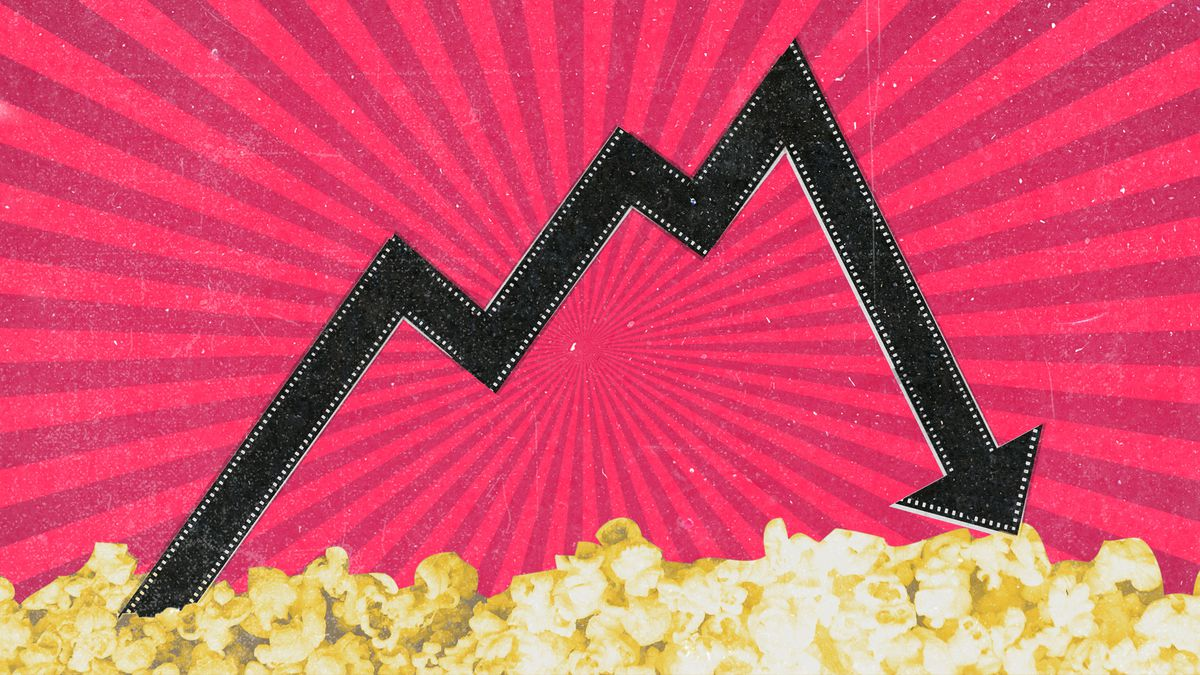

### Features Explanation

- ID - Integer unique id of each movie

- Belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. 

- Budget:Budget of a movie in dollars. 0 values mean unknown.

- Genres : Contains all the Genres Name & TMDB Id in JSON Format

- Homepage - Contains the official homepage URL of a movie. 

- Imdb_id - IMDB id of a movie 

- Original_language - Two digit code of the original language, in which the movie was made.

- Original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

- Overview - Brief description of the movie.

- Popularity - Popularity of the movie .

- Poster_path - Poster path of a movie. 

- Production_companies - All production company name and TMDB id in JSON format of a movie.

- Production_countries - Two digit code and full name of the production company in JSON format.

- Release_date - Release date of a movie in mm/dd/yy format.Some fields are in mm/dd/yyyy format

- Runtime - Total runtime of a movie in minutes.

- Spoken_languages - Two digit code and full name of the spoken language.

- Status - Is the movie released or rumored?

- Tagline - Tagline of a movie

- Title - English title of a movie

- Keywords - TMDB Id and name of all the keywords in JSON format.

- Cast - All cast TMDB id, name, character name, gender (0= Unspecified , 1 = Female, 2 = Male) in JSON format

- Crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

- Revenue - Total revenue earned by a movie in dollars which is the target variable

In [1]:
#pip install matplotlib

In [2]:
#pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset into the python 

In [4]:
movies_train=pd.read_csv("train.csv")
movies_test=pd.read_csv("test.csv")

In [5]:
movies_train.head(5)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [6]:
movies_test.head(2)

id                              belongs_to_collection  budget  \
0  3001  [{'id': 34055, 'name': 'Pokémon Collection', '...       0   
1  3002                                                NaN   88000   

                                              genres  \
0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   

                                production_countries release_date runtime  \
0  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07    90.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58    65.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   

                                            Keywords  \
0  [{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...   
1  [{'id': 9748, 'name': 'revenge'}, {'id': 9951,...   

                                                cast  \
0  [{'cast_id': 3, 'character': 'Tonio', 'credit_...   
1  [{'cast_id': 2, 'character': 'Nancy Fowler Arc...   

                                                crew  
0  [{'credit_id': '52fe44e7c3a368484e03d683', 'de...  
1  [{'credit_id': '55807805c3a3685b1300060b', 'de...  

[2 rows x 22 columns]

### Dimensions of the Dataset

In [7]:
movies_train.shape

(3000, 23)

In [8]:
movies_test.shape

(4398, 22)

We can see that the train dataset has 3000 rows and 23 columns 

Test dataset has 4398 rows and 22 columns

The target variable is removed from the test 

Combining the both , rows will be 7398 and columns will be 23 which satisfy the requirements of project


### Basic Checks in the dataset

#### Basic information of the dataset

In [9]:
movies_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [10]:
movies_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

We can see from the above that there are some null values in the both the dataset which needs to be dealt during preprocessing

#### Check the datatypes of the dataset

In [11]:
movies_train.dtypes.value_counts().to_frame()

0
object   18
int64     3
float64   2

In [12]:
movies_test.dtypes.value_counts().to_frame()

0
object   18
int64     2
float64   2

From the above , we can see that most of the features are of object datatype and out of the 23 , only 3 are of int datatype and  2 are of float data type 

#### Basic statistical summary of the numerical variables

In [13]:
movies_train.describe().style.background_gradient(cmap="YlOrRd")

We can see that the budget and run time has Zero values which is not possible and this needs to be checked

The target variable Revenue also has minimum value has 1 which also needs to be analysed

In [14]:
movies_train.describe(include="object")

belongs_to_collection  \
count                                                 604   
unique                                                422   
top     [{'id': 645, 'name': 'James Bond Collection', ...   
freq                                                   16   

                               genres                           homepage  \
count                            2993                                946   
unique                            872                                941   
top     [{'id': 18, 'name': 'Drama'}]  http://www.transformersmovie.com/   
freq                              266                                  4   

          imdb_id original_language original_title  \
count        3000              3000           3000   
unique       3000                36           2975   
top     tt2637294                en         Joshua   
freq            1              2575              2   

                                                 overview  \
count                                                2992   
unique                                               2992   
top     When Lou, who has become the "father of the In...   
freq                                                    1   

                             poster_path  \
count                               2999   
unique                              2999   
top     /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
freq                                   1   

                             production_companies  \
count                                        2844   
unique                                       2383   
top     [{'name': 'Paramount Pictures', 'id': 4}]   
freq                                           51   

                                     production_countries release_date  \
count                                                2945         3000   
unique                                                321         2398   
top     [{'iso_3166_1': 'US', 'name': 'United States o...      9/10/10   
freq                                                 1752            5   

                                spoken_languages    status  \
count                                       2980      3000   
unique                                       401         2   
top     [{'iso_639_1': 'en', 'name': 'English'}]  Released   
freq                                        1817      2996   

                       tagline                  title  \
count                     2403                   3000   
unique                    2400                   2969   
top     Based on a true story.  The Magnificent Seven   
freq                         3                      2   

                                           Keywords  cast  \
count                                          2724  2987   
unique                                         2648  2975   
top     [{'id': 10183, 'name': 'independent film'}]    []   
freq                                             27    13   

                                                     crew  
count                                                2984  
unique                                               2984  
top     [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
freq                                                    1

We can understand the below things from the table 

- Belongs to collection field has only 604 count out of 3000 which conveys only this much are part of series
- Genre has also some values missing 
- Homepage has only 946 out of 3000 enteries which means only these movies have homepage 
- There are 36 unique original languages in the dataset which english topping the list 
- There are only 2975 original titles which are unique , others might be repetition - need to analyse
- Belongs to collection , genre , production companies, production countries, spoken languages,key words, cast ,crew are in Json format

#### Check for the duplicates

In [15]:
movies_train[movies_train.duplicated()].shape

(0, 23)

In [16]:
movies_test[movies_test.duplicated()].shape

(0, 22)

We can see that there are no duplicate rows in the dataset

## Exploratory Data Analysis

We will now analyse each of the features individually and some features need some preprocessing before EDA

Firstly we will deal with the numerical features and then will move ahead with the categorical features

### Numerical Features - Univariate analysis

#### 1. Revenue 

In [17]:
movies_train["revenue"].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


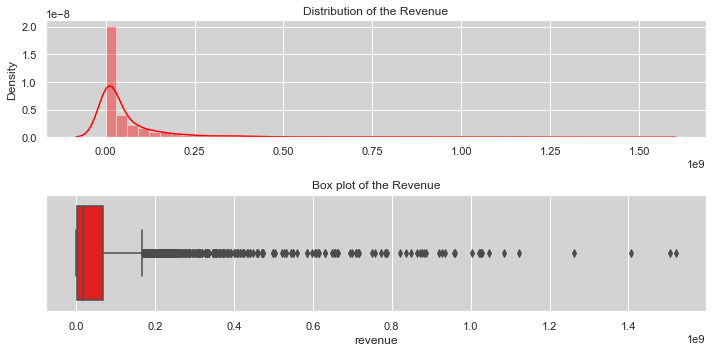

In [18]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.distplot(x=movies_train["revenue"],color="red")
plt.title("Distribution of the Revenue")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["revenue"],color="red")
plt.title("Box plot of the Revenue")
plt.tight_layout()
plt.show()

We can see that the Revenue is highly right skewed and for modelling purpose , we will change it to logrithmic distribution to reduce the skewness

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

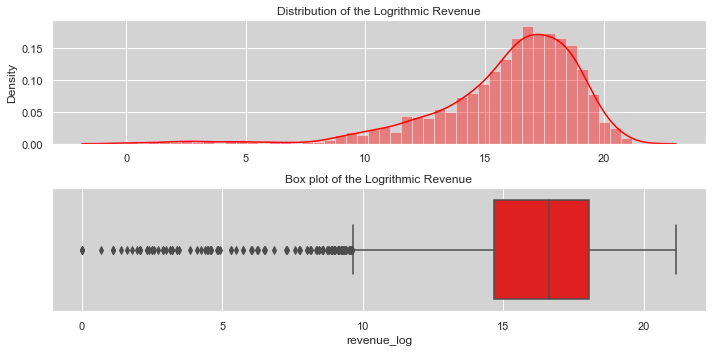

In [19]:
movies_train["revenue_log"]=movies_train['revenue'].apply(np.log)

plt.figure(figsize = (10,5))
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.distplot(x=movies_train["revenue_log"],color="red")
plt.title("Distribution of the Logrithmic Revenue")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["revenue_log"],color="red")
plt.title("Box plot of the Logrithmic Revenue")
plt.tight_layout()
plt.show()

We have reduced the skewness of the Revenue and will proceed with this for modelling

#### 2. Budget

In [20]:
movies_train["budget"].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [21]:
movies_train["budget"].value_counts().to_frame().head(20)

budget
0            812
15000000      72
40000000      71
25000000      71
5000000       68
20000000      68
30000000      65
12000000      54
10000000      53
50000000      50
35000000      46
60000000      42
4000000       40
2000000       39
6000000       39
8000000       38
13000000      36
3000000       34
7000000       34
18000000      31

We have the maximum value as Zero in the budget which is not possible , hence we will consider this as null values and fill the values as due to the high zeros , our output prediction might be impacted 

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


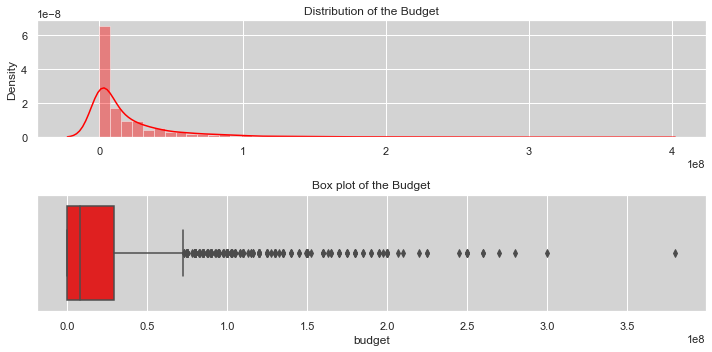

In [22]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.distplot(x=movies_train["budget"],color="red")
plt.title("Distribution of the Budget")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["budget"],color="red")
plt.title("Box plot of the Budget")
plt.tight_layout()
plt.show()

The budget column is also highly skewed and there are many outliers in the budget , we need to take the logrithmic function of the budget for modelling. But prior to that we need to replace the Zeros .Here i am planning to replace fill the zero values with the median as there are 800 + values in the dataset which needs to be filled . So manually searching for the Budget of all these and filling will not be a feasible solution

In [23]:
movies_train["budget"] = movies_train["budget"].replace(0,movies_train["budget"].median())
movies_test["budget"] = movies_test["budget"].replace(0,movies_test["budget"].median())


C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


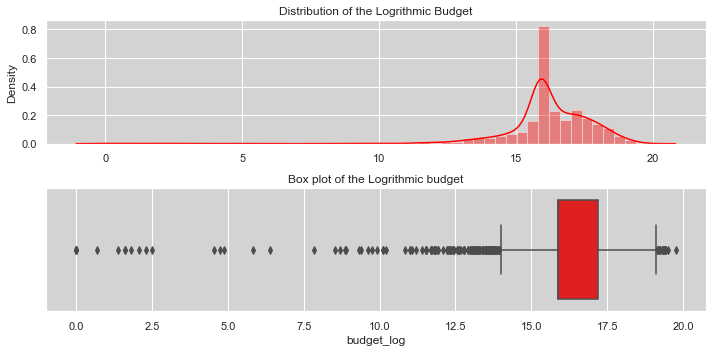

In [24]:
movies_train["budget_log"]=movies_train['budget'].apply(np.log)
movies_test["budget_log"]=movies_test['budget'].apply(np.log)
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.distplot(x=movies_train["budget_log"],color="red")
plt.title("Distribution of the Logrithmic Budget")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["budget_log"],color="red")
plt.title("Box plot of the Logrithmic budget")
plt.tight_layout()
plt.show()

In [25]:
print(len(movies_train[movies_train['budget'] == 0]))
print(len(movies_test[movies_test['budget'] == 0]))

0
0


We can see that the Zero values have been replaced with the median in both test and train dataset

#### 3. Popularity

In [26]:
movies_train["popularity"].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


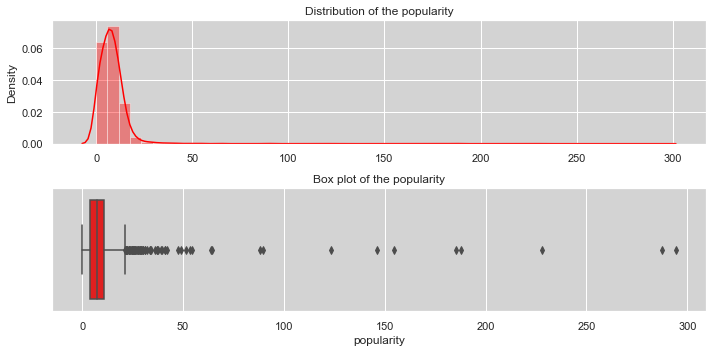

In [27]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.distplot(x=movies_train["popularity"],color="red")
plt.title("Distribution of the popularity")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["popularity"],color="red")
plt.title("Box plot of the popularity")
plt.tight_layout()
plt.show()

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


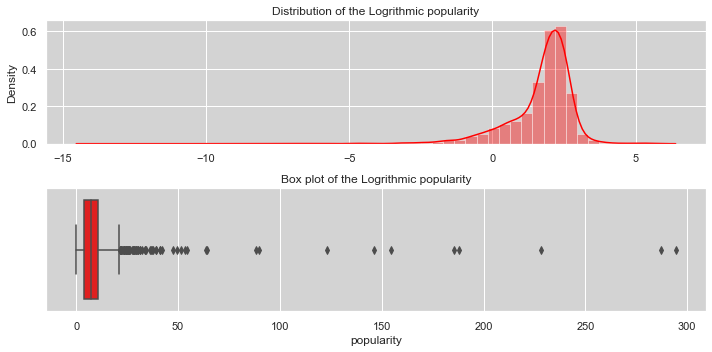

In [28]:
movies_train["popularity_log"]=movies_train['popularity'].apply(np.log)
movies_test["popularity_log"]=movies_test['popularity'].apply(np.log)
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.distplot(x=movies_train["popularity_log"],color="red")
plt.title("Distribution of the Logrithmic popularity")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["popularity"],color="red")
plt.title("Box plot of the Logrithmic popularity")
plt.tight_layout()
plt.show()

#### 4. Runtime

In [29]:
movies_train["runtime"].describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [30]:
print(len(movies_train[movies_train['runtime'] == 0]))
print(len(movies_test[movies_test['runtime'] == 0]))

12
9


In [31]:
movies_train["runtime"] = movies_train["runtime"].replace(0,movies_train["runtime"].median())
movies_test["runtime"] = movies_test["runtime"].replace(0,movies_test["runtime"].median())

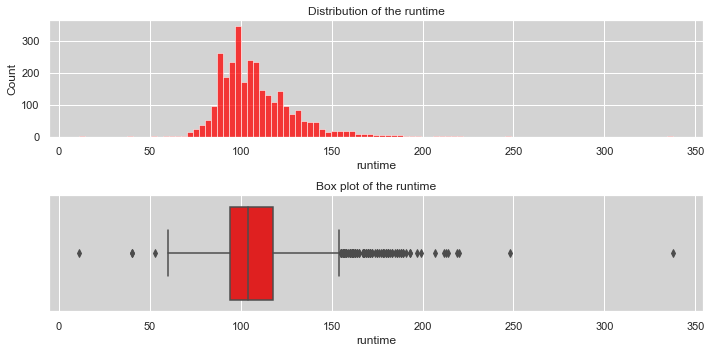

In [32]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
sns.histplot(x=movies_train["runtime"],color="red")
plt.title("Distribution of the runtime")

plt.subplot(2,1,2)
sns.boxplot(x=movies_train["runtime"],color="red")
plt.title("Box plot of the runtime")
plt.tight_layout()
plt.show()

We can see that the run time is mainly concentrated in the range from 70 to 120 mins with peak coming near the 100 mins

### Numerical Features - Bivariate analysis

#### 1. Budget vs Revenue

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


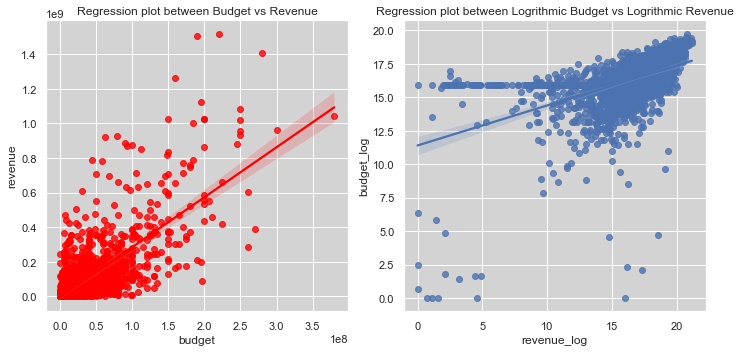

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(movies_train['budget'],movies_train['revenue'],color="Red")
plt.title("Regression plot between Budget vs Revenue" )

plt.subplot(1,2,2)
sns.regplot(movies_train["revenue_log"],movies_train["budget_log"])
plt.title("Regression plot between Logrithmic Budget vs Logrithmic Revenue" )
plt.tight_layout()
plt.show()

There is some linear relationship associated between budget and revenue in spite of many outlier points .We can observe that as the budget increases , there is increase in Revenue 

#### 2. Popularity vs Revenue

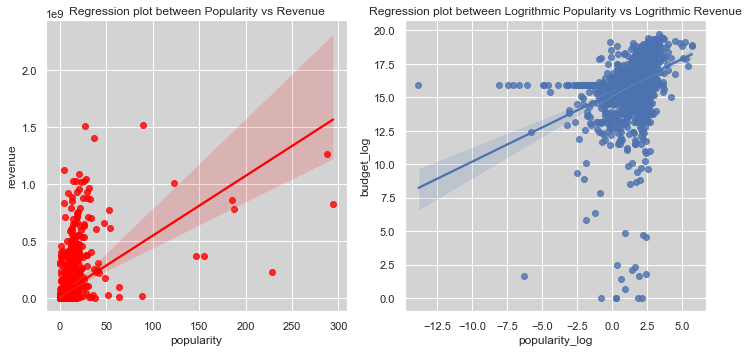

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(movies_train['popularity'],movies_train['revenue'],color="Red")
plt.title("Regression plot between Popularity vs Revenue" )

plt.subplot(1,2,2)
sns.regplot(movies_train["popularity_log"],movies_train["budget_log"])
plt.title("Regression plot between Logrithmic Popularity vs Logrithmic Revenue" )
plt.tight_layout()
plt.show()

Most of the popularity points are lying less than 50 and the revenue varies from min to max in the less than 50 value range . There are very few outliers above the 50 mark.We can see that the revenue is increasing from min to max when popularity increase within the 50 range value , so some relation between them is there

#### 2. Run time vs Revenue

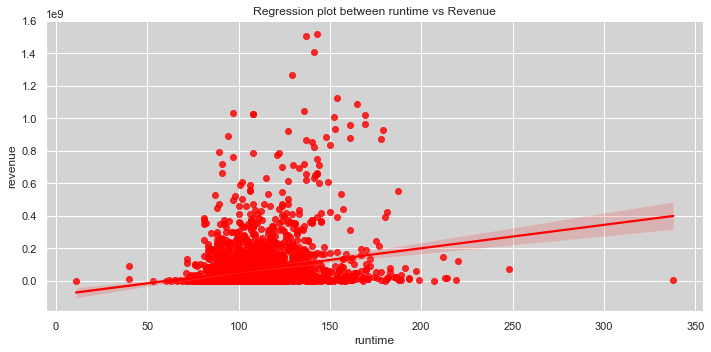

In [35]:
plt.figure(figsize=(10,5))
sns.regplot(movies_train['runtime'],movies_train['revenue'],color="Red")
plt.title("Regression plot between runtime vs Revenue" )
plt.tight_layout()
plt.show()


The revenue is generated maximum for movies which had run time in the range around 140 to 160 mins

#### Correlation among the numerical variables

<AxesSubplot:>

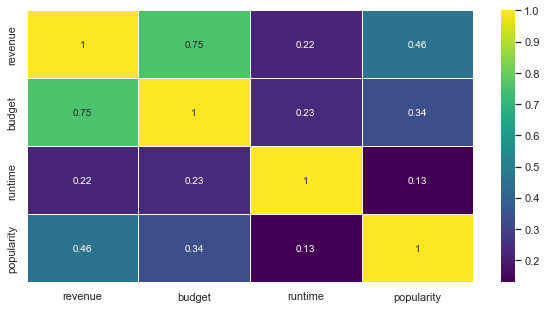

In [36]:
Num_var=["revenue","budget","runtime","popularity"]
plt.figure(figsize=(10,5))
sns.heatmap(movies_train[Num_var].corr(),annot=True,linewidth=0.9,cmap="viridis")

In [37]:
movies_train[Num_var].corr()["revenue"].sort_values(ascending=False).to_frame()

revenue
revenue     1.000000
budget      0.753490
popularity  0.461460
runtime     0.219908

We can see that the budget is having high correlation with the Revenue followed by popularity and then last runtime

We will now proceed for the Exploratory analysis of the categorical variables

Prior to that we need to process some of the columns and extract the required data as they are in Json Format

### Categorical Features - Exploratory analysis

#### 1. Homepage

In [38]:
movies_train['homepage'].describe(include=object)

count                                   946
unique                                  941
top       http://www.transformersmovie.com/
freq                                      4
Name: homepage, dtype: object

We cann see that there are 946 entries in homepage column out of which 941 are unique . So the column with this much unique values will be not useful , hence we can simply the column data to whether home page is available or not 

In [39]:
movies_train['homepage_available'] = 0
movies_train.loc[movies_train['homepage'].isnull() == False, 'homepage_available'] = 1
movies_test['homepage_available'] = 0
movies_test.loc[movies_test['homepage'].isnull() == False, 'homepage_available'] = 1

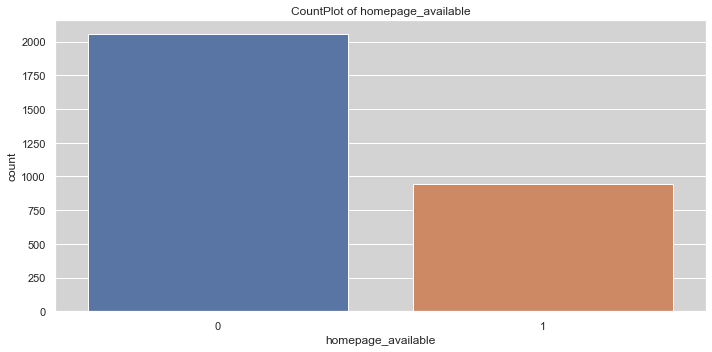

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='homepage_available',data=movies_train)
plt.title("CountPlot of homepage_available" )
plt.tight_layout()
plt.show()

Majority of the movies in the dataset are without homepage 

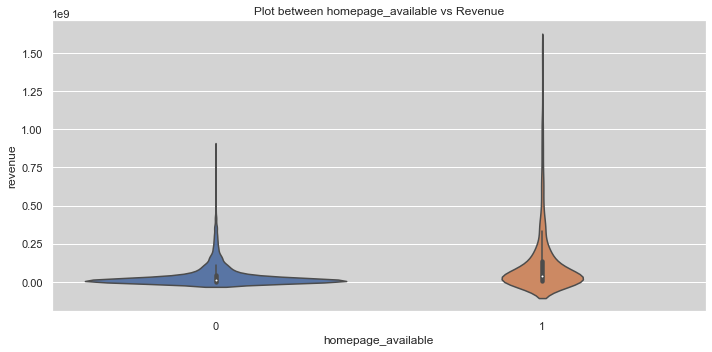

In [41]:
plt.figure(figsize=(10,5))
sns.violinplot(x='homepage_available',y='revenue',data=movies_train)
plt.title("Plot between homepage_available vs Revenue" )
plt.tight_layout()
plt.show()

We can see that movies with homepage have collected more revenue than the ones without homepage, so there is an advantage for movies with homepage as people can have access to the movie information prior to release or watching and create some interest which might be the reason for higher revenue

#### 2. Original Language

In [42]:
movies_train["original_language"].value_counts().head(10).to_frame()

original_language
en               2575
fr                 78
ru                 47
es                 43
hi                 42
ja                 37
it                 24
cn                 20
ko                 20
zh                 19

In [43]:
movies_train["original_language"].describe()

count     3000
unique      36
top         en
freq      2575
Name: original_language, dtype: object

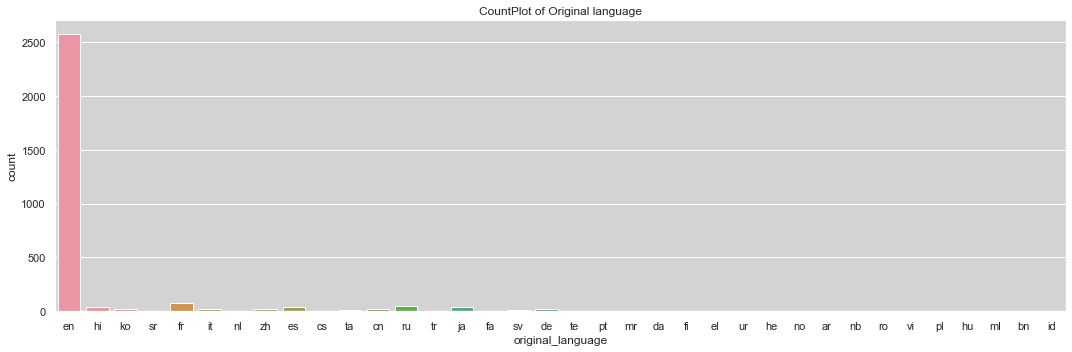

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='original_language',data=movies_train)
plt.title("CountPlot of Original language" )
plt.tight_layout()
plt.show()

- We can see that original language is dominated by English language and others are very limited in number
- Total 36 languages are there in the list with english topping with 2575

In [1]:
plt.figure(figsize=(10,5))
sns.barplot(x='language',y='revenue',data=data)
plt.title("Plot between Age vs Sides" )
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

We can see from the above that English language has more revenue followed by Chinese and turkish.

So we can group other languages together as they are of negligible amount to simplify the data in the column

In [46]:
movies_train['English Language or not'] =movies_train['original_language'].apply(lambda x: 1 if x=='en' else 0)
movies_test['English Language or not'] =movies_test['original_language'].apply(lambda x: 1 if x=='en' else 0)

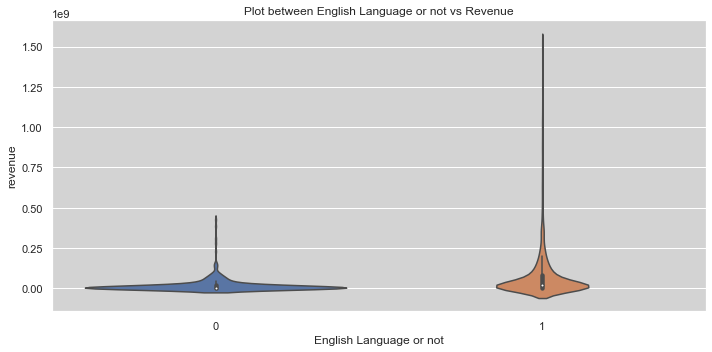

In [47]:
plt.figure(figsize=(10,5))
sns.violinplot(x='English Language or not',y='revenue',data=movies_train)
plt.title("Plot between English Language or not vs Revenue" )
plt.tight_layout()
plt.show()

As expected , movies with English have generated more revenue than other languages combined due to worldwide acceptance of English langauge

#### 3. Original Title

In [48]:
movies_train["original_title"].describe()

count       3000
unique      2975
top       Joshua
freq           2
Name: original_title, dtype: object

In [49]:
pip install wordcloud

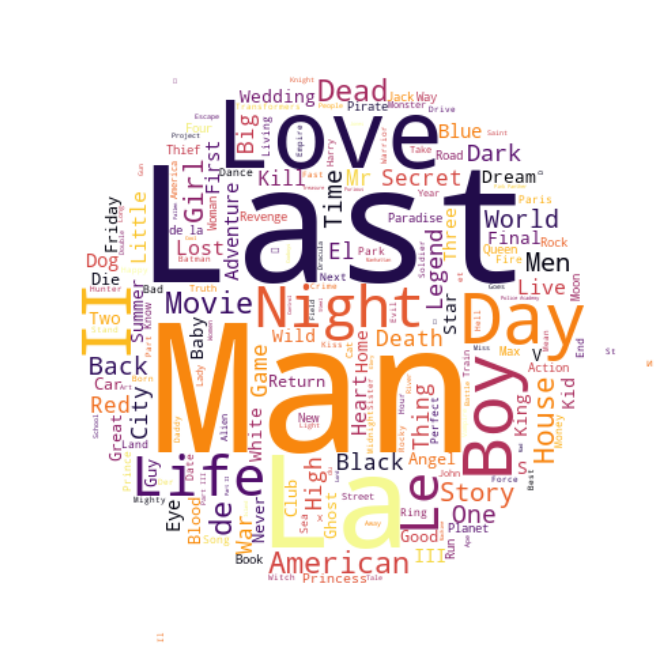

In [50]:
from wordcloud import WordCloud
from PIL import Image
plt.figure(figsize = (12, 12))
mask = np.array(Image.open(r"C:\Users\XArchitecture\Downloads\black-circle-transparent-png-31629716580aaihm9b0zv.png"))
text = " ".join(title for title in movies_train.original_title) 

wordcloud = WordCloud(width=5000, height=5000,max_words=200,prefer_horizontal=0.5,background_color="white",colormap="inferno",mask=mask).generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud is a visual representation of text data. Size and colors are used to show the relative importance of words or terms in a text. The bigger a term is the greater is its weight. So the size reflects the frequency of a words, which may correspond to its importance.

Based on this we can say that Man, Last , Boy,Love , Life , American are some of the important words from the original title

The original title is not having much impact on the revenue , may be we can consider whether the length of the title have any impact on the revenue 
We can consider to drop this feature in the feature engineeering stage

In [51]:
movies_train['original_title_letter_count'] = movies_train['original_title'].str.len() 
movies_train['original_title_word_count'] = movies_train['original_title'].str.split().str.len() 
movies_test['original_title_letter_count'] = movies_test['original_title'].str.len() 
movies_test['original_title_word_count'] = movies_test['original_title'].str.split().str.len() 


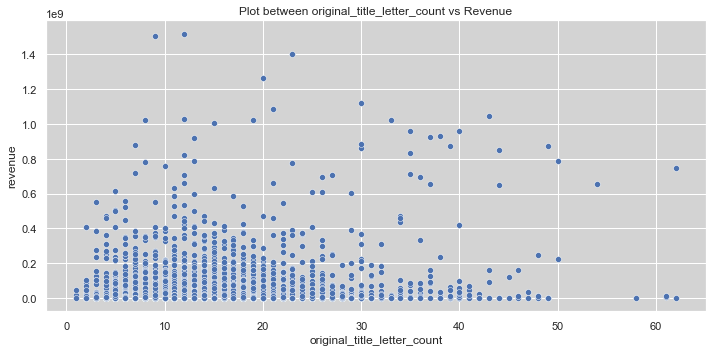

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='original_title_letter_count',y='revenue',data=movies_train)
plt.title("Plot between original_title_letter_count vs Revenue" )
plt.tight_layout()
plt.show()

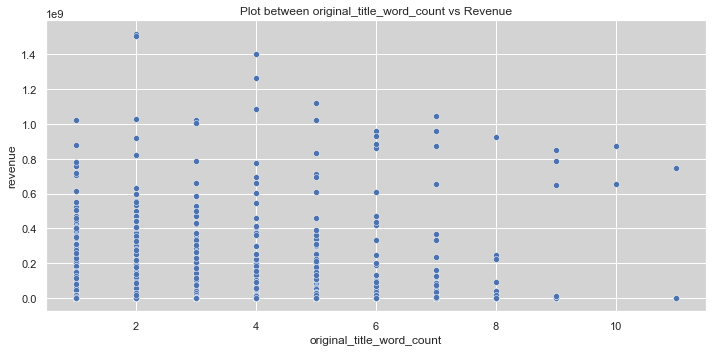

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='original_title_word_count',y='revenue',data=movies_train)
plt.title("Plot between original_title_word_count vs Revenue" )
plt.tight_layout()
plt.show()

We can see that there is a correlation between the revenue and title letter and word count . When the title and word count is less the revenue is higher

#### 4. Overview

In [54]:
movies_train["overview"].describe()

count                                                  2992
unique                                                 2992
top       When Lou, who has become the "father of the In...
freq                                                      1
Name: overview, dtype: object

Here out of 3000 columns , 2992 have values and all are unique , so it will not be of much use for revenue generation .

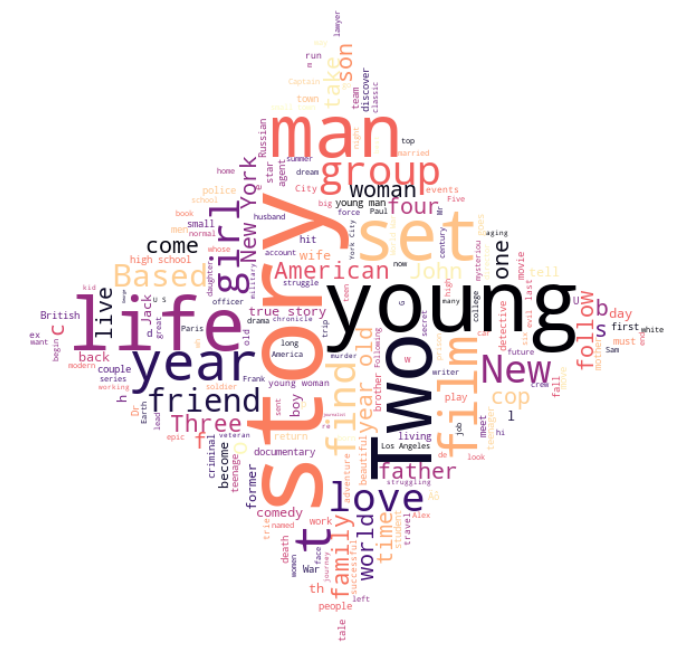

In [55]:
from wordcloud import WordCloud
from PIL import Image
plt.figure(figsize = (12, 12))
mask = np.array(Image.open(r"C:\Users\XArchitecture\Downloads\Diamond-Shape-PNG-Image-Background.png"))

wordcloud = WordCloud(width=5000, height=5000,max_words=200,prefer_horizontal=0.5,background_color="white",colormap="magma",mask=mask).generate(movies_train.overview.to_string())

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

The above wordplot shows the top words from overview

In [56]:
movies_train["overview"] = movies_train["overview"].fillna("")
movies_test["overview"] = movies_test["overview"].fillna("")
movies_train['count_of_overview_letter'] = movies_train['overview'].str.split().str.len() 
movies_test['count_of_overview_letter'] = movies_test['overview'].str.split().str.len() 

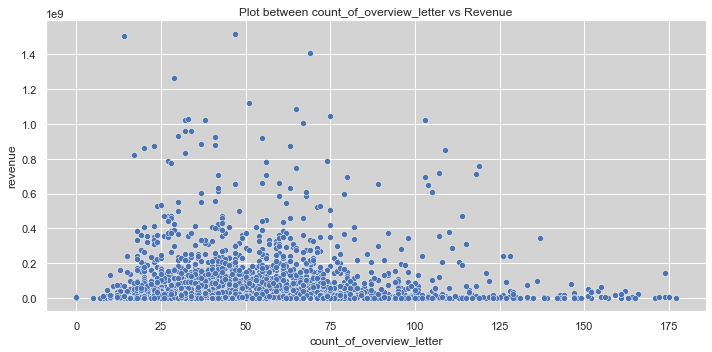

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='count_of_overview_letter',y='revenue',data=movies_train)
plt.title("Plot between count_of_overview_letter vs Revenue" )
plt.tight_layout()
plt.show()

Similar to the original title , there is a slight increase in revenue with overview words are less. This might be due to people easily reading the overview when it is short and crisp and getting the interest to watch the film

In [58]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [59]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [60]:
def sentiment(x):
  if type(x) == str:
    return SIA.polarity_scores(x)
  else:
    return {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0}

In [61]:
overview_sentimentanalyse = movies_train['overview'].apply(lambda x: sentiment(x))

In [62]:
negativity_overview = [sentiment['neg'] for sentiment in overview_sentimentanalyse]
compound_overview = [sentiment['compound'] for sentiment in overview_sentimentanalyse]

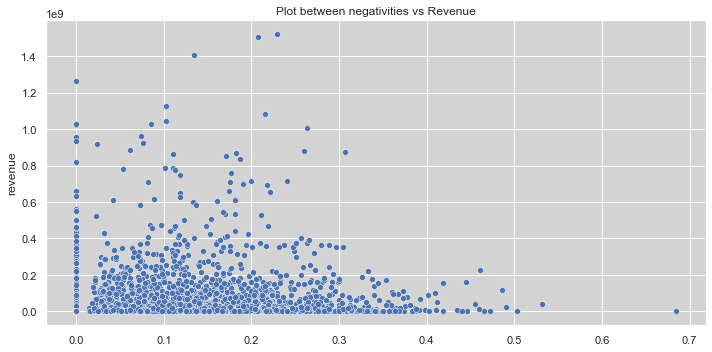

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= negativity_overview,y=movies_train["revenue"])
plt.title("Plot between negativities vs Revenue" )
plt.tight_layout()
plt.show()

We can see that negativity in the overview has some impact in revenue as when the negativity increases there is no increase in revenue .Reveneue is peaking at negative 0.00 value .
This might be due to people seeing more negative lines in overview might avoid watching the movies

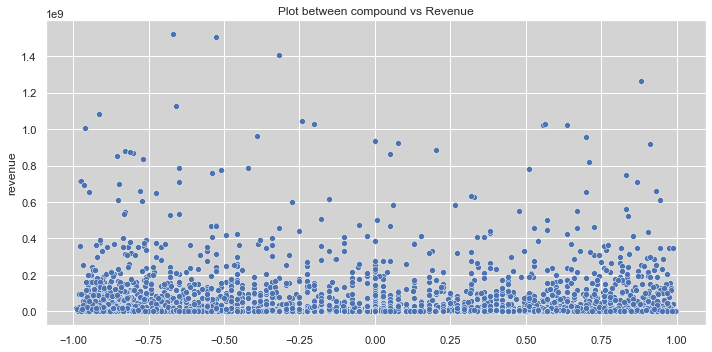

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= compound_overview,y=movies_train["revenue"])
plt.title("Plot between compound vs Revenue" )
plt.tight_layout()
plt.show()

Compound doesnt have much impact in the revenue . So this feature is of not much use as this is evenly distributed

#### 5. Tagline

In [65]:
movies_train["tagline"].describe()

count                       2403
unique                      2400
top       Based on a true story.
freq                           3
Name: tagline, dtype: object

There are some null values in tagline and 2400 are unique ones in the column

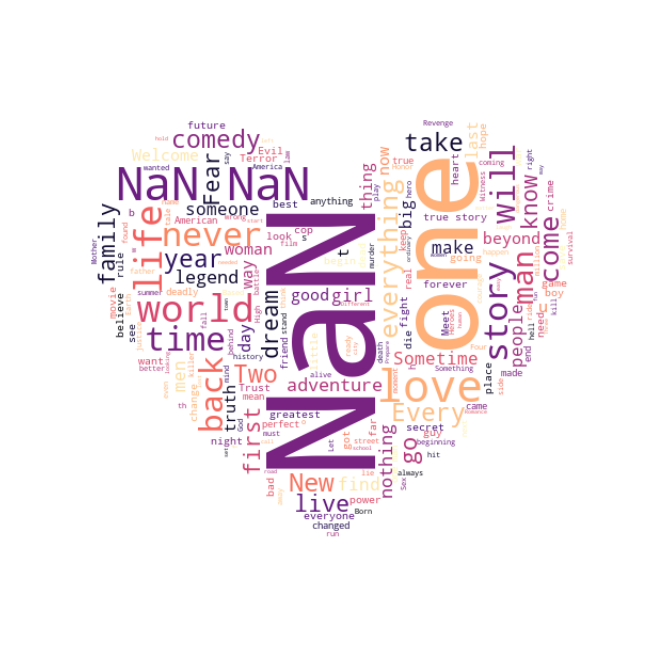

In [66]:
from wordcloud import WordCloud
from PIL import Image
plt.figure(figsize = (12, 12))
mask = np.array(Image.open(r"C:\Users\XArchitecture\Downloads\istockphoto-879492212-612x612.jpg"))

wordcloud = WordCloud(width=5000, height=5000,max_words=200,prefer_horizontal=0.5,background_color="white",colormap="magma",mask=mask).generate(movies_train.tagline.to_string())

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

The above shows the word cloud of the tagline . Since the column contains close to 600 null values , NAN is showing the maximum importance word

In [67]:
movies_train["tagline"] = movies_train["tagline"].fillna("")
movies_test["tagline"] = movies_test["tagline"].fillna("")
movies_train['count_of_tagline_words'] = movies_train['tagline'].str.split().str.len() 
movies_test['count_of_tagline'] = movies_test['tagline'].str.split().str.len() 

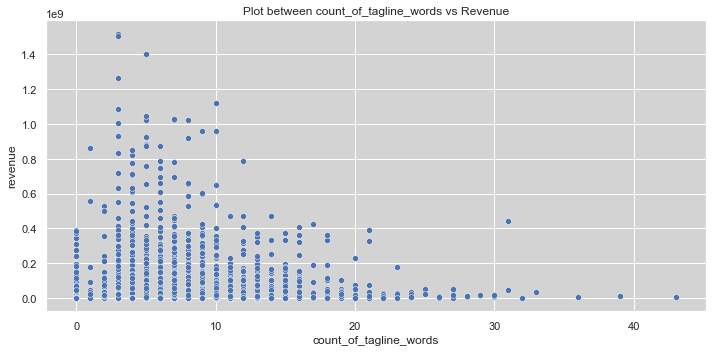

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='count_of_tagline_words',y='revenue',data=movies_train)
plt.title("Plot between count_of_tagline_words vs Revenue" )
plt.tight_layout()
plt.show()

We can clearly see that the revenue is more when the tagline is short and crisp which means people prefer movies with short tagline which can be easily communicated

In [69]:
tagline_sentimentanalyse = movies_train['tagline'].apply(lambda x: sentiment(x))

In [70]:
negative_tagline = [sentiment['neg'] for sentiment in tagline_sentimentanalyse]
neutral_tagline = [sentiment['neu'] for sentiment in overview_sentimentanalyse]

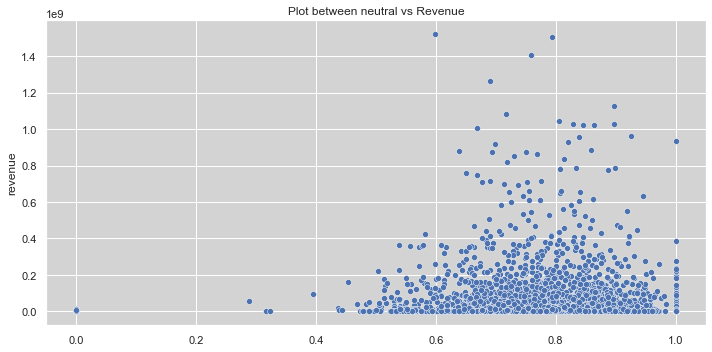

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= neutral_tagline,y=movies_train["revenue"])
plt.title("Plot between neutral vs Revenue" )
plt.tight_layout()
plt.show()

People are preferring tagline with neutrality without any issues , so that those ones have high revenues

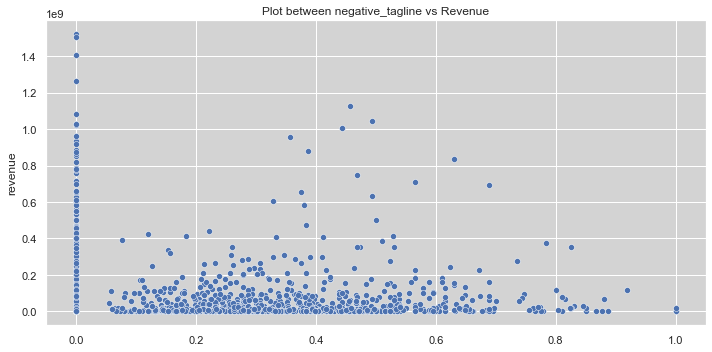

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= negative_tagline,y=movies_train["revenue"])
plt.title("Plot between negative_tagline vs Revenue" )
plt.tight_layout()
plt.show()

Similar to the overview , negative tagline impacts the revenue and people tends to avoid the same 

#### Relationship between tagline and Revenue

In [73]:
movies_train['has_tagline'] = movies_train['tagline'].apply(lambda x: 0 if len(x) == 0 else 1)
movies_test['has_tagline'] = movies_test['tagline'].apply(lambda x: 0 if len(x) == 0 else 1)

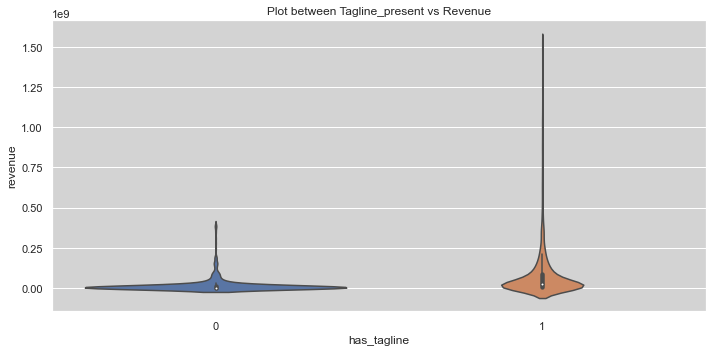

In [74]:
plt.figure(figsize=(10,5))
sns.violinplot(x='has_tagline',y='revenue',data=movies_train)
plt.title("Plot between Tagline_present vs Revenue" )
plt.tight_layout()
plt.show()

We can see that movies with tagline have more revenue which means people will get some idea or can communicate better with the helpf of tagline
So this feature might be useful for modelling

#### 6. Title

In [75]:
movies_train["title"].describe()

count                      3000
unique                     2969
top       The Magnificent Seven
freq                          2
Name: title, dtype: object

There are no missing values in title and 2969 unique values in title 

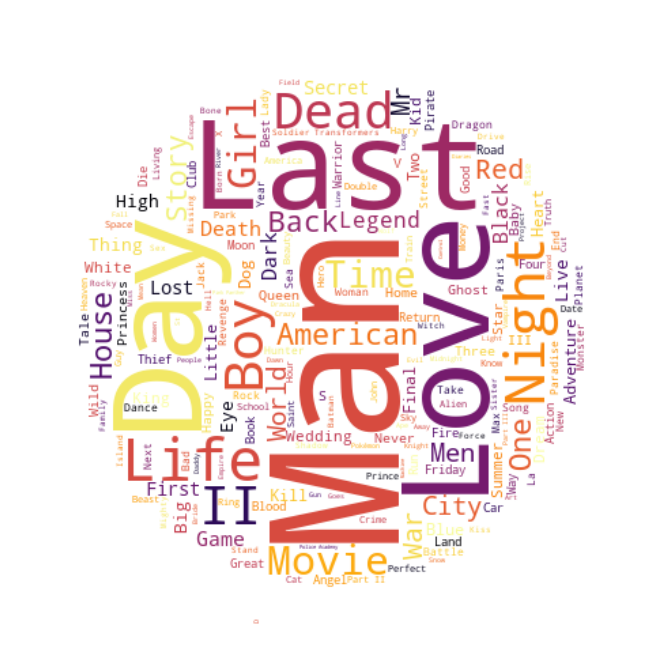

In [76]:
plt.figure(figsize = (12, 12))
mask = np.array(Image.open(r"C:\Users\XArchitecture\Downloads\black-circle-transparent-png-31629716580aaihm9b0zv.png"))
text = " ".join(title for title in movies_train.title) 

wordcloud = WordCloud(width=5000, height=5000,max_words=200,prefer_horizontal=0.5,background_color="white",colormap="inferno",mask=mask).generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud of the title 

Same like Original title , title also will not have impact as it will be full of unique values , so will try to find the relation with the length

In [77]:
movies_train['title_letter_count'] = movies_train['original_title'].str.len() 
movies_train['title_word_count'] = movies_train['original_title'].str.split().str.len() 
movies_test['title_letter_count'] = movies_test['original_title'].str.len() 
movies_test['title_word_count'] = movies_test['original_title'].str.split().str.len() 

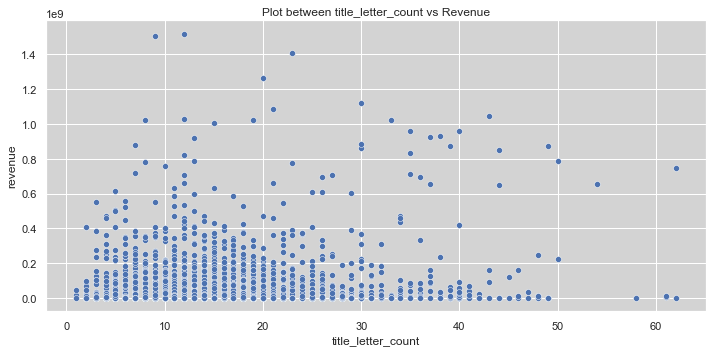

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='title_letter_count',y='revenue',data=movies_train)
plt.title("Plot between title_letter_count vs Revenue" )
plt.tight_layout()
plt.show()

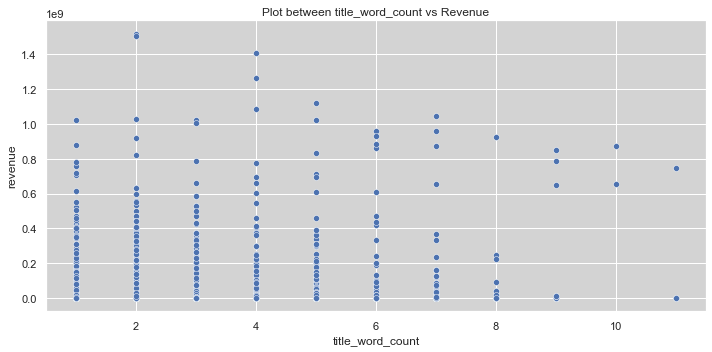

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='title_word_count',y='revenue',data=movies_train)
plt.title("Plot between title_word_count vs Revenue" )
plt.tight_layout()
plt.show()

We can see similar results with the original title that short titles generate more revenue 

In [80]:
movies_train['isTitleDifferent'] = 0
movies_train.loc[movies_train['original_title'] == movies_train['title'] ,"isTitleDifferent"] = 1 

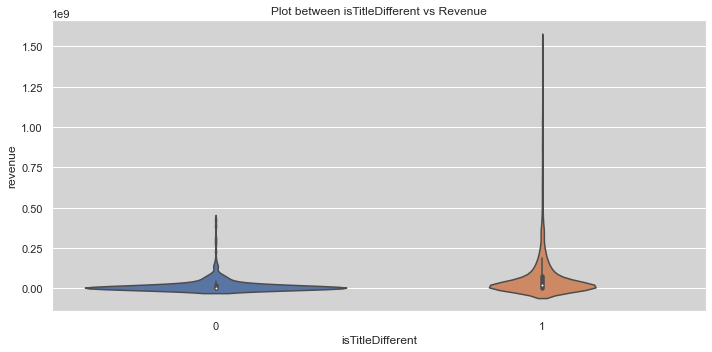

In [81]:
plt.figure(figsize=(10,5))
sns.violinplot(x='isTitleDifferent',y='revenue',data=movies_train)
plt.title("Plot between isTitleDifferent vs Revenue" )
plt.tight_layout()
plt.show()

We can see that interestingly same title have generated more revenue , so this means that peopl all over the world will have more probablity of watching the movie if title is same due to WOM and buzz as title will be same 

### 7. Status

In [82]:
movies_train["status"].describe()

count         3000
unique           2
top       Released
freq          2996
Name: status, dtype: object

In [83]:
movies_train["status"].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [84]:
movies_train.loc[movies_train['status']=='Rumored', ['original_title','release_date','revenue']]

original_title release_date   revenue
609   The Swan Princess: Escape from Castle Mountain       1/1/97    273644
1007                         Billy Gardell: Halftime       2/5/11        60
1216                                     Extremities      8/22/86  13418091
1618                          A Place Called Chiapas      2/20/98    229000

Here there are 4 rumoured films are added to this list which might not be possible to generate revenue , we can eliminate those rows and consider only released ones , which further makes this column same throughout . So this column can be dropped during preprocessing

#### 8. belongs_to_collection

In [85]:
movies_train["belongs_to_collection"].describe()

count                                                   604
unique                                                  422
top       [{'id': 645, 'name': 'James Bond Collection', ...
freq                                                     16
Name: belongs_to_collection, dtype: object

- There are only 604 entries out of 3000 columns which means only these movies are related to series/collection 
- Out of these 422 are unique ones 


In [86]:
movies_train["belongs_to_collection"][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

We can see that belongs to collection contains ID , name and poster path . Fom this we can only extract the name of the collection it is belonging to. The other two information might not have any impact in terms of revenue 

In [87]:
movies_train["belongs_to_collection"][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [88]:
import ast
movies_train['collection_name'] = movies_train['belongs_to_collection'].apply(lambda x: 'None' if pd.isnull(x) else ast.literal_eval(x)[0]['name'])
movies_test['collection_name'] = movies_test['belongs_to_collection'].apply(lambda x: 'None' if pd.isnull(x) else ast.literal_eval(x)[0]['name'])

In [89]:
collect=movies_train['collection_name'].value_counts().head(16)
collection=collect.to_frame()
collection=collect[1:15]
collection

James Bond Collection                     16
Friday the 13th Collection                 7
The Pink Panther (Original) Collection     6
Police Academy Collection                  5
Pokémon Collection                         5
Paranormal Activity Collection             4
Transformers Collection                    4
Rocky Collection                           4
Resident Evil Collection                   4
Alien Collection                           4
Rambo Collection                           4
The Fast and the Furious Collection        4
Child's Play Collection                    4
Ice Age Collection                         4
Name: collection_name, dtype: int64

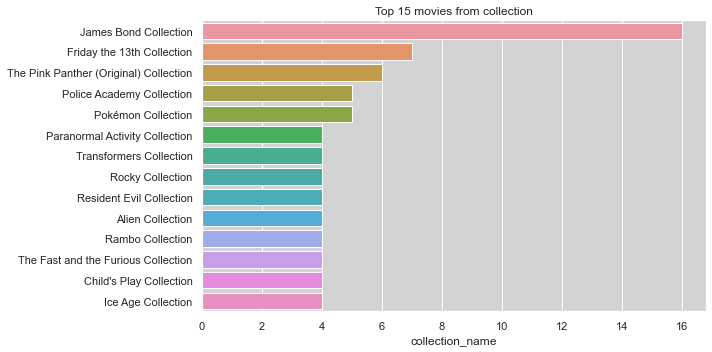

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(x=collection,y=collection.index)
plt.title("Top 15 movies from collection" )
plt.tight_layout()
plt.show()

We have created a column extracting the column names but this is having many unique values which wont be useful for predicting revenue . So we can simplify the column by considering whether they belong to collection or not 

In [91]:
movies_train['part of collection'] = movies_train['collection_name'].apply(lambda x: 0 if x=="None" else 1)
movies_test['part of collection'] = movies_test['collection_name'].apply(lambda x: 0 if x=="None" else 1)

In [92]:
movies_train['part of collection'].value_counts()

0    2396
1     604
Name: part of collection, dtype: int64

We have now reduced the same to a simple column which we can use to analyse and compare with revenue 

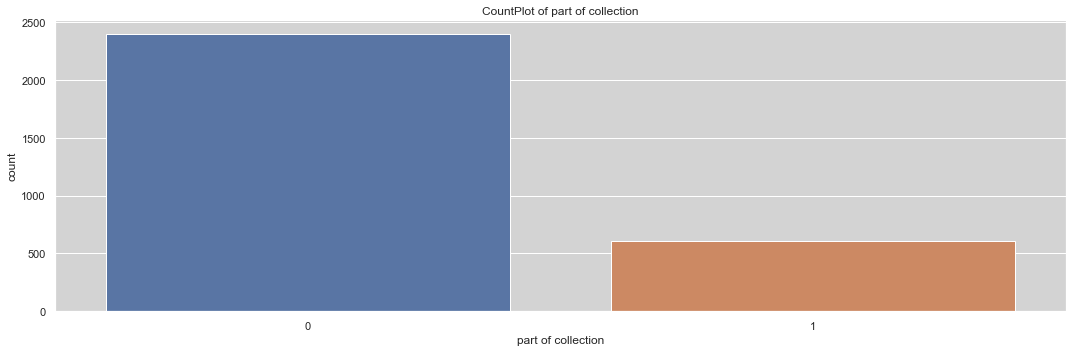

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x='part of collection',data=movies_train)
plt.title("CountPlot of part of collection" )
plt.tight_layout()
plt.show()

As known , the majority of movies doesnt belong to collection / series

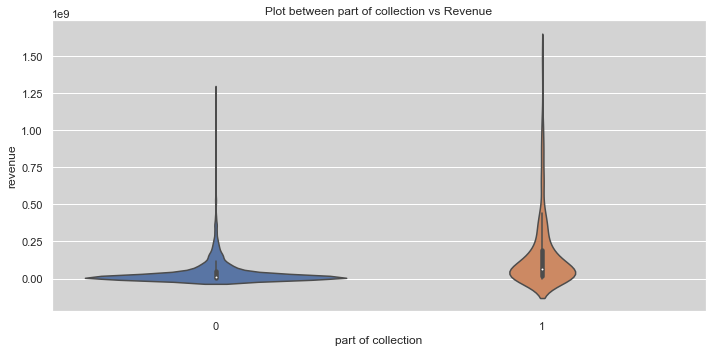

In [94]:
plt.figure(figsize=(10,5))
sns.violinplot(x='part of collection',y='revenue',data=movies_train)
plt.title("Plot between part of collection vs Revenue" )
plt.tight_layout()
plt.show()

We can see that even though the number of movies belonging to collection are less , the revenue generated by them is more . This is because , people who would have watched the previous movies would come and watch the upcoming movies and would have been a fan of the franchise.This would have generated more revenue due to fan following 

#### 9. Genres

In [95]:
movies_train["genres"].describe()

count                              2993
unique                              872
top       [{'id': 18, 'name': 'Drama'}]
freq                                266
Name: genres, dtype: object

We can see that the 2993 values are there in 3000 rows and out of which 872 are unique

In [96]:
movies_train["genres"][0]

"[{'id': 35, 'name': 'Comedy'}]"

The genre column consists of id and genre name , so we will only need the genre name . Hence will only extract those names from columns

In [97]:
movies_train["genres"]=movies_train['genres'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["genres"]=movies_test['genres'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [98]:
def convert(obj):
    L=[]
    for i in obj:
        if obj!= {}:
            L.append(i["name"])
        else:
            continue
    return L

In [99]:
movies_train["genre_name"]=movies_train["genres"].apply(convert)
movies_test["genre_name"]=movies_test["genres"].apply(convert)
movies_train["genre_name"]

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genre_name, Length: 3000, dtype: object

In [100]:
movies_train["genre_count"]=movies_train['genre_name'].apply(lambda x: len(x) if x != {} else 0)
movies_test["genre_count"]=movies_test['genre_name'].apply(lambda x: len(x) if x != {} else 0)
movies_train["genre_count"].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genre_count, dtype: int64

In [101]:
genres_namecount = dict()
for genrename in movies_train["genre_name"]:
    for elem in genrename:
        if elem not in genres_namecount:
            genres_namecount[elem] = 1
        else:
            genres_namecount[elem] += 1

In [102]:
genres_name_count=pd.DataFrame.from_dict(genres_namecount,orient="index")
genres_name_count.columns = ["number_of_movies"]
genres_name_count=genres_name_count.sort_values(by="number_of_movies",ascending=False)

In [103]:
genres_namecount1 = dict()
for genrename in movies_test["genre_name"]:
    for elem in genrename:
        if elem not in genres_namecount1:
            genres_namecount1[elem] = 1
        else:
            genres_namecount1[elem] += 1

In [104]:
genres_name_count_test=pd.DataFrame.from_dict(genres_namecount1,orient="index")
genres_name_count_test.columns = ["number_of_movies"]
genres_name_count_test=genres_name_count_test.sort_values(by="number_of_movies",ascending=False)

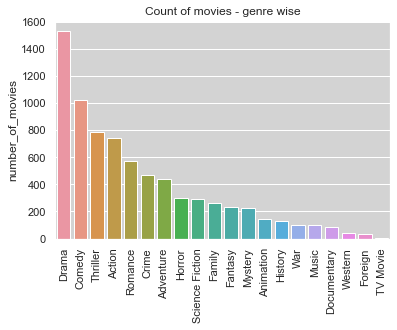

In [105]:
sns.barplot(x=genres_name_count.index,y=genres_name_count["number_of_movies"])
plt.title("Count of movies - genre wise")
plt.xticks(rotation=90)
plt.show()

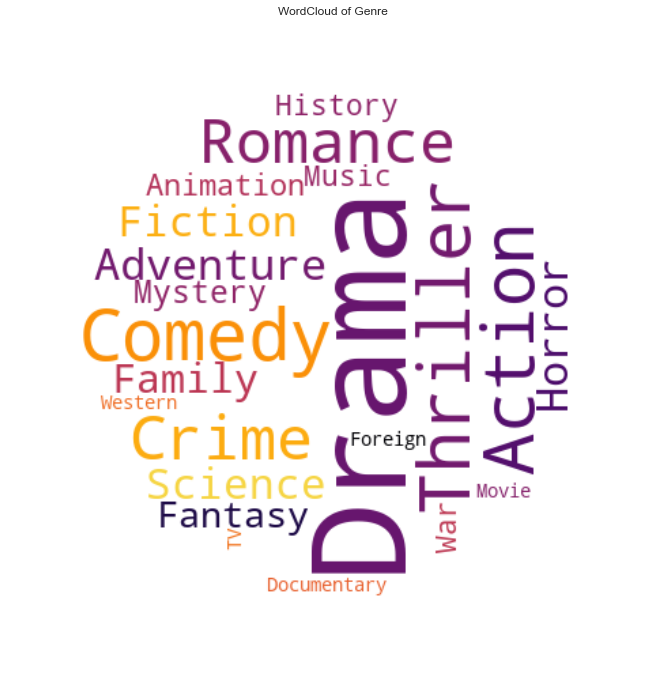

In [106]:
plt.figure(figsize = (12, 12))
mask = np.array(Image.open(r"C:\Users\XArchitecture\Downloads\black-circle-transparent-png-31629716580aaihm9b0zv.png"))

wordcloud = WordCloud(width=5000, height=5000,max_words=200,prefer_horizontal=0.5,background_color="white",colormap="inferno",mask=mask).generate(genres_name_count.number_of_movies.to_string())

plt.imshow(wordcloud,interpolation='bilinear')
plt.title("WordCloud of Genre")
plt.axis("off")
plt.show()

We can see that Drama movies are topping the list of number of movies followed by Comedy and Thriller from the graph and Wordcloud

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


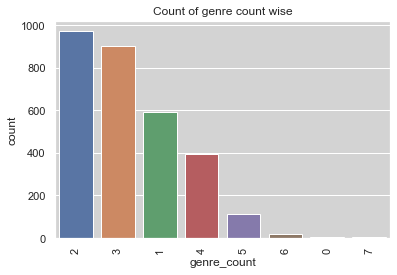

In [107]:
sns.countplot(movies_train["genre_count"],order = movies_train["genre_count"].value_counts().index)
plt.title("Count of genre count wise")
plt.xticks(rotation=90)
plt.show()

We can see that the Genre count wise plot above which shows that 2 genre movies are topping the list followed by 3 and 1

<Figure size 720x360 with 0 Axes>

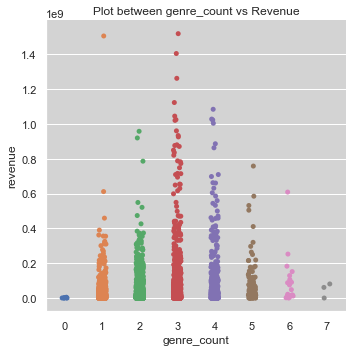

In [108]:
plt.figure(figsize=(10,5))
sns.catplot(x='genre_count',y='revenue',data=movies_train)
plt.title("Plot between genre_count vs Revenue" )
plt.tight_layout()
plt.show()

The revenue is maximum for genre count 3 followed by 4 and 2 - So people prefer when genre count is between 2 to 4 

In [109]:
genres_detail=movies_train.loc[movies_train['genres'].str.len()==1][['genres','revenue','budget','popularity','runtime']].reset_index(drop=True)
genres_detail['genres']

0           [{'id': 35, 'name': 'Comedy'}]
1            [{'id': 18, 'name': 'Drama'}]
2      [{'id': 99, 'name': 'Documentary'}]
3            [{'id': 18, 'name': 'Drama'}]
4           [{'id': 35, 'name': 'Comedy'}]
                      ...                 
588          [{'id': 18, 'name': 'Drama'}]
589          [{'id': 18, 'name': 'Drama'}]
590          [{'id': 18, 'name': 'Drama'}]
591          [{'id': 18, 'name': 'Drama'}]
592          [{'id': 18, 'name': 'Drama'}]
Name: genres, Length: 593, dtype: object

In [110]:
genres_detail['genres']=genres_detail['genres'].apply(lambda x :x[0]['name'])
genres_detail=genres_detail.groupby(genres_detail.genres).agg('mean')

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

<AxesSubplot:xlabel='runtime', ylabel='genres'>

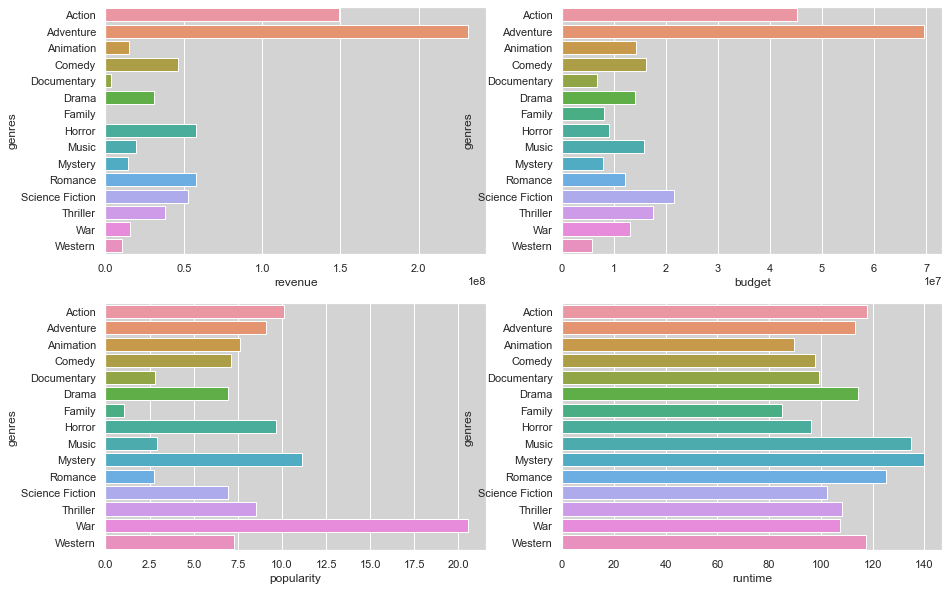

In [111]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(genres_detail['revenue'],genres_detail.index)

plt.subplot(2,2,2)
sns.barplot(genres_detail['budget'],genres_detail.index)

plt.subplot(2,2,3)
sns.barplot(genres_detail['popularity'],genres_detail.index)

plt.subplot(2,2,4)
sns.barplot(genres_detail['runtime'],genres_detail.index)

- Since genre was having multiple ones , have filtered out the unique ones and considered that as sample and did the analysis 
- Adventure is generating the maximum revenue followed by action , horror and romance
- Budget wise , advanture tops the list followed by action and science fiction 
- Popularity wise war tops the list , followed by mystery , action and adventure
- Runtime wise mystery tops the list followed by music,romance,action

#### 10. Production companies

In [112]:
movies_train["production_companies"].describe()

count                                          2844
unique                                         2383
top       [{'name': 'Paramount Pictures', 'id': 4}]
freq                                             51
Name: production_companies, dtype: object

- There are some missing values in the production companies - 5844 columns have values out of 3000 out of which 2383 are unique
- Paramount pictures tops the list in production companies

In [113]:
movies_train["production_companies"][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

We can see that the columns contain company name and id. We only require the company name , so will extract that information

In [114]:
movies_train["production_companies"]=movies_train['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["production_companies"]=movies_test['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [115]:
movies_train["production_companies_name"]=movies_train["production_companies"].apply(convert)
movies_test["production_companies_name"]=movies_test["production_companies"].apply(convert)
movies_train["production_companies_name"]

0       [Paramount Pictures, United Artists, Metro-Gol...
1                                  [Walt Disney Pictures]
2       [Bold Films, Blumhouse Productions, Right of W...
3                                                      []
4                                                      []
                              ...                        
2995             [Warner Bros., Morgan Creek Productions]
2996                           [Memfis Film, Film i Väst]
2997    [New Line Cinema, Forge, The Steve Tisch Company]
2998                   [Jersey Films, Loofah Productions]
2999    [Lions Gate Films, Vertigo Entertainment, Goth...
Name: production_companies_name, Length: 3000, dtype: object

In [116]:
movies_train["production_companies_count"]=movies_train['production_companies_name'].apply(lambda x: len(x) if x != {} else 0)
movies_test["production_companies_count"]=movies_test['production_companies_name'].apply(lambda x: len(x) if x != {} else 0)
movies_train["production_companies_count"].value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: production_companies_count, dtype: int64

In [117]:
prod_com_namecount = dict()
for pcname in movies_train["production_companies_name"]:
    for elem in pcname:
        if elem not in prod_com_namecount:
            prod_com_namecount[elem] = 1
        else:
            prod_com_namecount[elem] += 1

In [118]:
prod_com_namecount=pd.DataFrame.from_dict(prod_com_namecount,orient="index")
prod_com_namecount.columns = ["number_of_movies"]
prod_com_namecount=prod_com_namecount.sort_values(by="number_of_movies",ascending=False).head(20)

In [119]:
prod_com_namecount1 = dict()
for pcname in movies_test["production_companies_name"]:
    for elem in pcname:
        if elem not in prod_com_namecount1:
            prod_com_namecount1[elem] = 1
        else:
            prod_com_namecount1[elem] += 1

In [120]:
prod_com_namecount_test=pd.DataFrame.from_dict(prod_com_namecount1,orient="index")
prod_com_namecount_test.columns = ["number_of_movies"]
prod_com_namecount_test=prod_com_namecount_test.sort_values(by="number_of_movies",ascending=False).head(20)

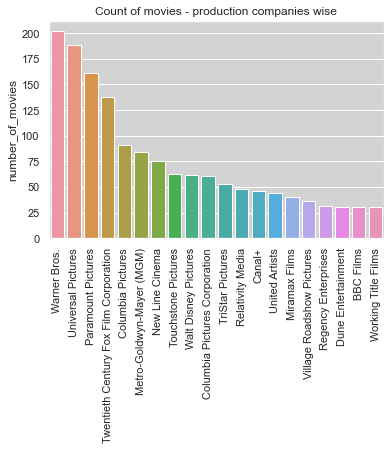

In [121]:
sns.barplot(x=prod_com_namecount.index,y=prod_com_namecount["number_of_movies"])
plt.title("Count of movies - production companies wise")
plt.xticks(rotation=90)
plt.show()

We can see that warner bros. have produced the maximum number of movies in the production companies list followed by universal pictures and Paramount pictures

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


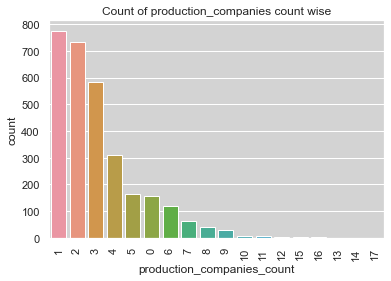

In [122]:
sns.countplot(movies_train["production_companies_count"],order = movies_train["production_companies_count"].value_counts().index)
plt.title("Count of production_companies count wise")
plt.xticks(rotation=90)
plt.show()

We can see that single companies have produced the maximum movies followed by 2 and 3 . But we can understand there has been collaration of more than 10 companies upto 17 companies.We can see the null values of 156 which we checked earlier , this needs to be handled during preprocessing

<Figure size 1080x360 with 0 Axes>

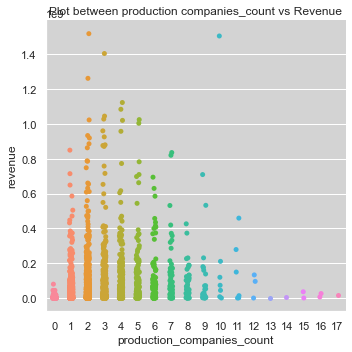

In [123]:
plt.figure(figsize=(15,5))
sns.catplot(x='production_companies_count',y='revenue',data=movies_train)
plt.title("Plot between production companies_count vs Revenue" )
plt.tight_layout()
plt.show()

We can see that companies_combination of range 2-4 have generated more revenue

#### 11. Production countries

In [124]:
movies_train["production_countries"].describe()

count                                                  2945
unique                                                  321
top       [{'iso_3166_1': 'US', 'name': 'United States o...
freq                                                   1752
Name: production_countries, dtype: object

The column contains 2945 values out of 3000 and out of which 321 are unique
US is the most popular country in the column

In [125]:
movies_train["production_countries"][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

We have id and name of country . We can extract only the country name as done before

In [126]:
movies_train["production_countries"]=movies_train['production_countries'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["production_countries"]=movies_test['production_countries'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [127]:
movies_train["production_countries_name"]=movies_train["production_countries"].apply(convert)
movies_test["production_countries_name"]=movies_test["production_countries"].apply(convert)
movies_train["production_countries_name"]

0       [United States of America]
1       [United States of America]
2       [United States of America]
3                          [India]
4                    [South Korea]
                   ...            
2995    [United States of America]
2996             [Denmark, Sweden]
2997    [United States of America]
2998    [United States of America]
2999    [United States of America]
Name: production_countries_name, Length: 3000, dtype: object

In [128]:
movies_train["production_countries_count"]=movies_train['production_countries_name'].apply(lambda x: len(x) if x != {} else 0)
movies_test["production_countries_count"]=movies_test['production_countries_name'].apply(lambda x: len(x) if x != {} else 0)
movies_train["production_countries_count"].value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries_count, dtype: int64

In [129]:
prod_country_namecount = dict()
for pcounname in movies_train["production_countries_name"]:
    for i in pcounname:
        if i not in prod_country_namecount:
            prod_country_namecount[i] = 1
        else:
            prod_country_namecount[i] += 1

In [130]:
prod_country_namecount=pd.DataFrame.from_dict(prod_country_namecount,orient="index")
prod_country_namecount.columns = ["number_of_movies"]
prod_country_namecount=prod_country_namecount.sort_values(by="number_of_movies",ascending=False).head(15)

In [131]:
prod_country_namecount1 = dict()
for pcounname in movies_test["production_countries_name"]:
    for i in pcounname:
        if i not in prod_country_namecount1:
            prod_country_namecount1[i] = 1
        else:
            prod_country_namecount1[i] += 1

In [132]:
prod_country_namecount_test=pd.DataFrame.from_dict(prod_country_namecount1,orient="index")
prod_country_namecount_test.columns = ["number_of_movies"]
prod_country_namecount_test=prod_country_namecount_test.sort_values(by="number_of_movies",ascending=False).head(15)

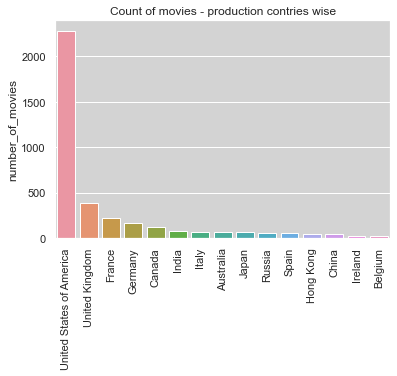

In [133]:
sns.barplot(x=prod_country_namecount.index,y=prod_country_namecount["number_of_movies"])
plt.title("Count of movies - production contries wise")
plt.xticks(rotation=90)
plt.show()

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


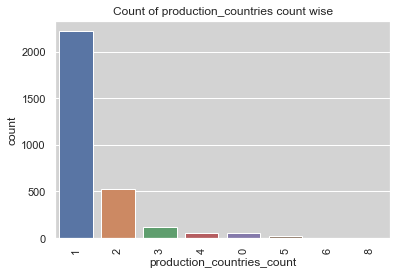

In [134]:
sns.countplot(movies_train["production_countries_count"],order = movies_train["production_countries_count"].value_counts().index)
plt.title("Count of production_countries count wise")
plt.xticks(rotation=90)
plt.show()

- We can see that almost 2000+ columns have production companies from US . Also production companies from single countries are maximum
- We can later create a column production country from US or not to simply this feature

<Figure size 720x360 with 0 Axes>

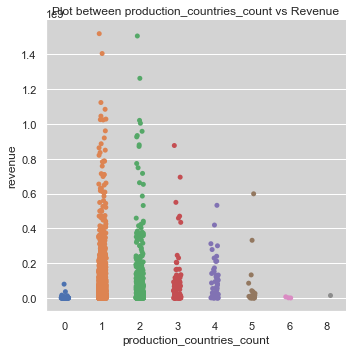

In [135]:
plt.figure(figsize=(10,5))
sns.catplot(x='production_countries_count',y='revenue',data=movies_train)
plt.title("Plot between production_countries_count vs Revenue" )
plt.tight_layout()
plt.show()

Production companies with one country or two have generated more revenue 

#### 12.Spoken languages

In [136]:
movies_train["spoken_languages"].describe()

count                                         2980
unique                                         401
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                          1817
Name: spoken_languages, dtype: object

- There are 2980 entries in the column out of 3000 and out of which 401 are unique entries
- English seems to be the most common language

In [137]:
movies_train["spoken_languages"][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

The column contains id and name . We can extract only the name from language which is the only required information

In [138]:
movies_train["spoken_languages"]=movies_train['spoken_languages'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["spoken_languages"]=movies_test['spoken_languages'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [139]:
movies_train["spoken_languages_name"]=movies_train["spoken_languages"].apply(convert)
movies_test["spoken_languages_name"]=movies_test["spoken_languages"].apply(convert)
movies_train["spoken_languages_name"]

0               [English]
1               [English]
2               [English]
3       [English, हिन्दी]
4               [한국어/조선말]
              ...        
2995            [English]
2996            [svenska]
2997            [English]
2998            [English]
2999            [English]
Name: spoken_languages_name, Length: 3000, dtype: object

In [140]:
movies_train["spoken_languages_count"]=movies_train['spoken_languages_name'].apply(lambda x: len(x) if x != {} else 0)
movies_test["spoken_languages_count"]=movies_test['spoken_languages_name'].apply(lambda x: len(x) if x != {} else 0)
movies_train["spoken_languages_count"].value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages_count, dtype: int64

In [141]:
spoken_languages_namecount = dict()
for slname in movies_train["spoken_languages_name"]:
    for i in slname:
        if i not in spoken_languages_namecount:
            spoken_languages_namecount[i] = 1
        else:
            spoken_languages_namecount[i] += 1

In [142]:
spoken_languages_namecount=pd.DataFrame.from_dict(spoken_languages_namecount,orient="index")
spoken_languages_namecount.columns = ["number_of_movies"]
spoken_languages_namecount=spoken_languages_namecount.sort_values(by="number_of_movies",ascending=False).head(20)

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 368

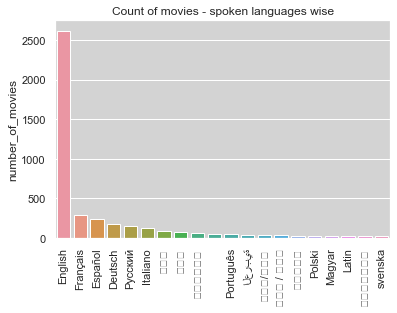

In [143]:
sns.barplot(x=spoken_languages_namecount.index,y=spoken_languages_namecount["number_of_movies"])
plt.title("Count of movies - spoken languages wise")
plt.xticks(rotation=90)
plt.show()

- The most spoken language is English followed by French and Spanish
- Since English is the most spoken language , we can classify this column as Englishspeaking or not Englishspeaking and delete this column

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


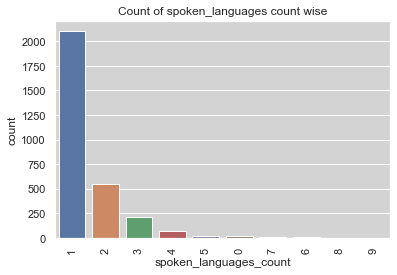

In [144]:
sns.countplot(movies_train["spoken_languages_count"],order = movies_train["spoken_languages_count"].value_counts().index)
plt.title("Count of spoken_languages count wise")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

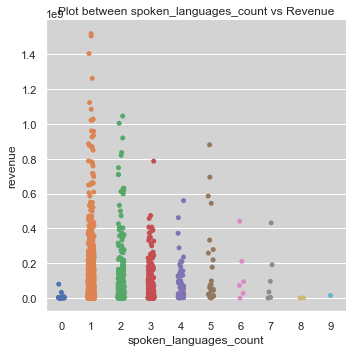

In [145]:
plt.figure(figsize=(10,5))
sns.catplot(x='spoken_languages_count',y='revenue',data=movies_train)
plt.title("Plot between spoken_languages_count vs Revenue" )
plt.tight_layout()
plt.show()

Single language spoken movies are the most and it has also generated the most revenue followed by 2 spoken languages

#### 13. Keywords

In [146]:
movies_train["Keywords"].describe()

count                                            2724
unique                                           2648
top       [{'id': 10183, 'name': 'independent film'}]
freq                                               27
Name: Keywords, dtype: object

- We have 2724 entries in the column out of which unique ones of 2648 .

- The most common one is independent film

In [147]:
movies_train["Keywords"][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

We only need the name of the keywords, so will only extract that information

In [148]:
movies_train["Keywords"]=movies_train["Keywords"].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["Keywords"]=movies_test["Keywords"].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [149]:
movies_train["Keywords_name"]=movies_train["Keywords"].apply(convert)
movies_test["Keywords_name"]=movies_test["Keywords"].apply(convert)
movies_train["Keywords_name"]

0       [time travel, sequel, hot tub, duringcreditsst...
1           [coronation, duty, marriage, falling in love]
2       [jazz, obsession, conservatory, music teacher,...
3       [mystery, bollywood, police corruption, crime,...
4                                                      []
                              ...                        
2995    [prison, sex, handcuffs, waitress, fight, fire...
2996    [sweden, punk, based on comic, all girl band, ...
2997    [assassination, amnesia, hostage, chase, dark ...
2998    [beach, honeymoon, bride, chance, risk, relati...
2999    [cia, airport, hero, fight, kidnapping, time b...
Name: Keywords_name, Length: 3000, dtype: object

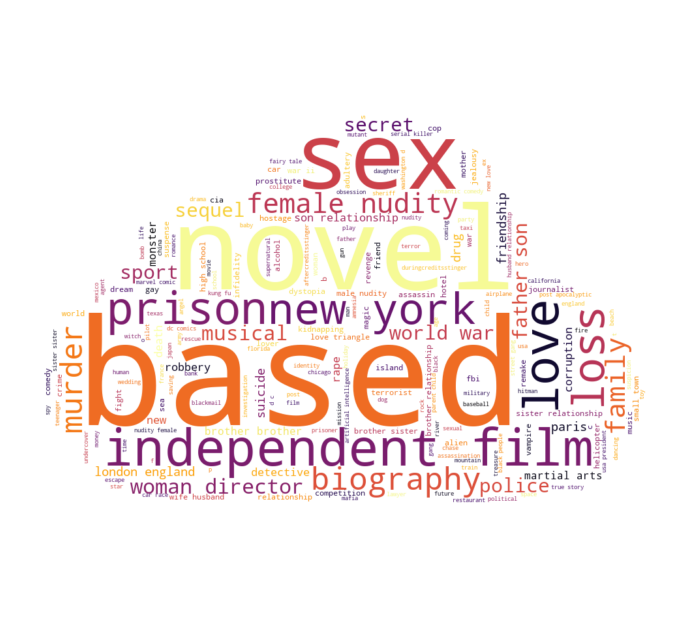

In [150]:
plt.figure(figsize = (12, 12))
mask = np.array(Image.open(r"C:\Users\XArchitecture\Downloads\black-cloud-icon-on-white-background-vector-13695081.jpg"))

wordcloud = WordCloud(width=5000, height=5000,max_words=200,prefer_horizontal=0.5,background_color="white",colormap="inferno",mask=mask).generate(movies_train.Keywords_name.to_string())

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [151]:
movies_train["Keywords_count"]=movies_train['Keywords_name'].apply(lambda x: len(x) if x != {} else 0)
movies_test["Keywords_count"]=movies_test['Keywords_name'].apply(lambda x: len(x) if x != {} else 0)
movies_train["Keywords_count"].value_counts()

5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
15      59
14      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
31       2
29       2
30       2
32       2
28       2
37       2
33       1
39       1
40       1
38       1
149      1
43       1
97       1
Name: Keywords_count, dtype: int64

In [152]:
Keywords_namecount = dict()
for kname in movies_train["Keywords_name"]:
    for i in kname:
        if i not in Keywords_namecount:
            Keywords_namecount[i] = 1
        else:
            Keywords_namecount[i] += 1

In [153]:
Keywords_namecount=pd.DataFrame.from_dict(Keywords_namecount,orient="index")
Keywords_namecount.columns = ["number"]
Keywords_namecount=Keywords_namecount.sort_values(by="number",ascending=False).head(20)

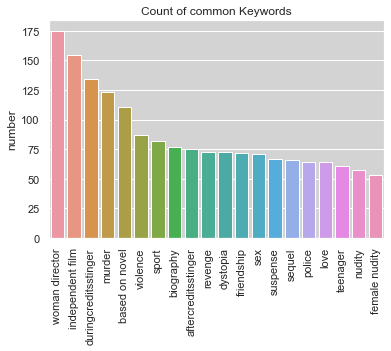

In [154]:
sns.barplot(x=Keywords_namecount.index,y=Keywords_namecount["number"])
plt.title("Count of common Keywords")
plt.xticks(rotation=90)
plt.show()

The above somes top 20 popular keywords from the movies

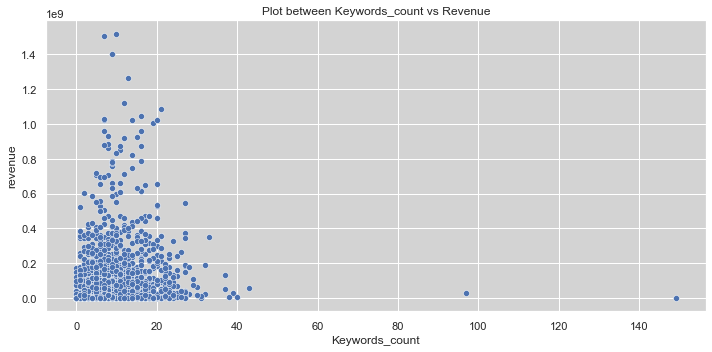

In [155]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Keywords_count',y='revenue',data=movies_train)
plt.title("Plot between Keywords_count vs Revenue" )
plt.tight_layout()
plt.show()

The keywords count is mainly concentrated less than 20 and there is not much inference from this  regards to the Revenue comparison . This keyword feature doesnt seem to have much impact in regards to revenue 

### 14. Cast

In [156]:
movies_train["cast"].describe()

count     2987
unique    2975
top         []
freq        13
Name: cast, dtype: object

There are 2987 entries out of 3000 out of which 2975 are unique 

In [157]:
movies_train["cast"][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

- Each of the entry have details of Castid , Character,creditid,gender,name,order and profile path
- We will extract the character , cast name and gender details  from this column

In [158]:
movies_train["cast"]=movies_train["cast"].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["cast"]=movies_test["cast"].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [159]:
movies_train["cast_name"]=movies_train["cast"].apply(convert)
movies_test["cast_name"]=movies_test["cast"].apply(convert)
movies_train["cast_name"]

0       [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1       [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2       [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3       [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4       [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
                              ...                        
2995    [Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...
2996    [Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...
2997    [Geena Davis, Samuel L. Jackson, Yvonne Zima, ...
2998    [Ben Stiller, Jennifer Aniston, Philip Seymour...
2999    [Taylor Lautner, Lily Collins, Alfred Molina, ...
Name: cast_name, Length: 3000, dtype: object

In [160]:
cast_namecount = dict()
for cname in movies_train["cast_name"]:
    for i in cname:
        if i not in cast_namecount:
            cast_namecount[i] = 1
        else:
            cast_namecount[i] += 1

In [161]:
cast_namecount=pd.DataFrame.from_dict(cast_namecount,orient="index")
cast_namecount.columns = ["number"]
cast_namecount=cast_namecount.sort_values(by="number",ascending=False).head(25)

In [162]:
cast_namecount_test = dict()
for cname1 in movies_test["cast_name"]:
    for i in cname1:
        if i not in cast_namecount_test:
            cast_namecount_test[i] = 1
        else:
            cast_namecount_test[i] += 1

In [163]:
cast_namecount_test=pd.DataFrame.from_dict(cast_namecount_test,orient="index")
cast_namecount_test.columns = ["number"]
cast_namecount_test=cast_namecount_test.sort_values(by="number",ascending=False).head(25)

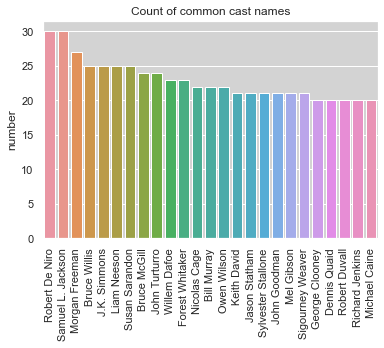

In [164]:
sns.barplot(x=cast_namecount.index,y=cast_namecount["number"])
plt.title("Count of common cast names")
plt.xticks(rotation=90)
plt.show()

In [165]:
def gender_count(obj):
    L=[]
    for i in obj:
        if obj!= {}:
            L.append(i["gender"])
        else:
            continue
    return L

In [166]:
movies_train["gender_class"]=movies_train["cast"].apply(gender_count)
movies_test["gender_class"]=movies_test["cast"].apply(gender_count)
movies_train["gender_class"]

0       [2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, ...
1       [1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, ...
2       [2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, ...
3                                   [1, 2, 0, 0, 0, 2, 0]
4                                            [2, 2, 2, 2]
                              ...                        
2995        [2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0]
2996                    [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1]
2997        [1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1]
2998    [2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, ...
2999    [2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, ...
Name: gender_class, Length: 3000, dtype: object

In [167]:
gendercount = dict()
for genderc in movies_train["gender_class"]:
    for i in genderc:
        if i not in gendercount:
            gendercount[i] = 1
        else:
            gendercount[i] += 1

In [168]:
gendercount=pd.DataFrame.from_dict(gendercount,orient="index")
gendercount.columns = ["number"]
gendercount=gendercount.sort_values(by="number",ascending=False)
gendercount

number
2   27949
0   20329
1   13533

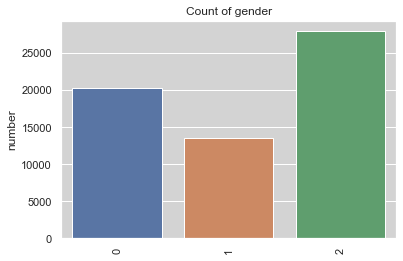

In [169]:
sns.barplot(x=gendercount.index,y=gendercount["number"])
plt.title("Count of gender")
plt.xticks(rotation=90)
plt.show()

0 is unspecified, 1 is female, and 2 is male - this is obtained from the kaggle book discussion 

So we can see that the male gender is maximum in the cast followed by unspecified and female is least 

In [170]:
def character_count(obj):
    L=[]
    for i in obj:
        if obj!= {}:
            L.append(i["character"])
        else:
            continue
    return L

In [171]:
movies_train["character_count"]=movies_train["cast"].apply(character_count)
movies_test["character_count"]=movies_test["cast"].apply(character_count)
movies_train["character_count"]

0       [Lou, Nick, Jacob, Adam Jr., Hot Tub Repairman...
1       [Mia Thermopolis, Queen Clarisse Renaldi, Joe,...
2       [Andrew Neimann, Terence Fletcher, Nicole, Rya...
3                              [Vidya Bagchi, , , , , , ]
4       [Chun-soo, Company president Kang, Yu-ri, Comp...
                              ...                        
2995    [Rock Reilly, Eddie Devane, Toni Johnson, Howa...
2996    [Bobo, Klara, Hedvig, Klaras pappa, Kenneth, R...
2997    [Samantha Caine / Charly Baltimore, Mitch Hene...
2998    [Reuben Feffer, Polly Prince, Sandy Lyle, Lisa...
2999    [Nathan Harper, Karen Murphy, Frank Burton, Ke...
Name: character_count, Length: 3000, dtype: object

In [172]:
char_count = dict()
for char in movies_train["character_count"]:
    for i in char:
        if i not in char_count:
            char_count[i] = 1
        else:
            char_count[i] += 1

In [173]:
charcount=pd.DataFrame.from_dict(char_count,orient="index")
charcount.columns = ["number"]
charcount=charcount.sort_values(by="number",ascending=False).head(20)
charcount

number
                              818
Himself                       610
Herself                       155
Dancer                        144
Additional Voices (voice)     100
Doctor                         77
Reporter                       70
Waitress                       69
Nurse                          65
Bartender                      55
Debutante                      54
Jack                           54
Security Guard                 50
Paul                           48
Frank                          44
Waiter                         41
Charlie                        41
Priest                         40
Cop                            40
Student                        39

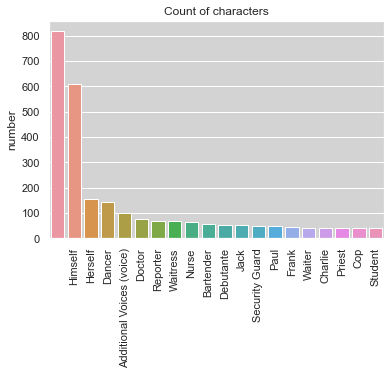

In [174]:
sns.barplot(x=charcount.index,y=charcount["number"])
plt.title("Count of characters")
plt.xticks(rotation=90)
plt.show()

We can see that most common ones are actors playing characters as themselves in case of male and female 

In [175]:
movies_train["cast_count"]=movies_train["cast_name"].apply(lambda x: len(x))
movies_test["cast_count"]=movies_test["cast_name"].apply(lambda x: len(x))
movies_train["cast_count"]

0       24
1       20
2       51
3        7
4        4
        ..
2995    15
2996    11
2997    15
2998    26
2999    34
Name: cast_count, Length: 3000, dtype: int64

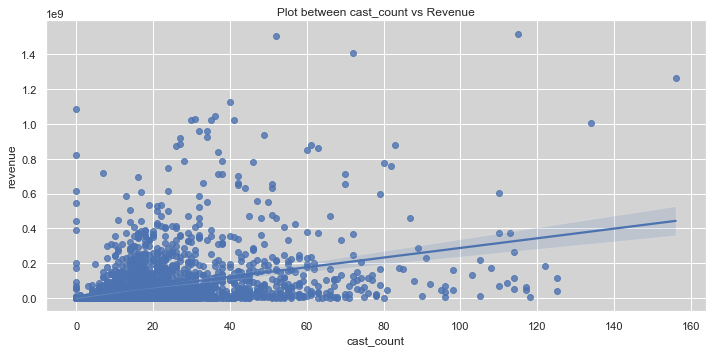

In [176]:
plt.figure(figsize=(10,5))
sns.regplot(x='cast_count',y='revenue',data=movies_train)
plt.title("Plot between cast_count vs Revenue" )
plt.tight_layout()
plt.show()

There is a small positive correlation between cast size and revenue 

In [177]:
movies_train["cast_female_count"] = movies_train["gender_class"].apply(lambda x: sum([1 for i in x if i == 1]))
movies_train["cast_male_count"] = movies_train["gender_class"].apply(lambda x: sum([1 for i in x if i == 2]))
movies_test["cast_female_count"] = movies_test["gender_class"].apply(lambda x: sum([1 for i in x if i == 1]))
movies_test["cast_male_count"] = movies_test["gender_class"].apply(lambda x: sum([1 for i in x if i == 2]))

In [178]:
movies_train["cast_female_count"]

0        8
1       10
2        7
3        1
4        0
        ..
2995     3
2996     1
2997     4
2998     9
2999     9
Name: cast_female_count, Length: 3000, dtype: int64

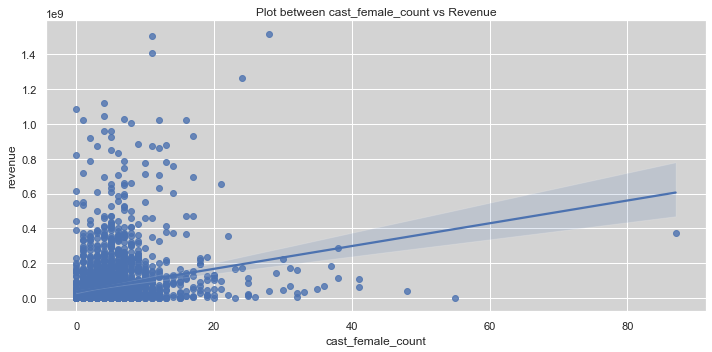

In [179]:
plt.figure(figsize=(10,5))
sns.regplot(x='cast_female_count',y='revenue',data=movies_train)
plt.title("Plot between cast_female_count vs Revenue" )
plt.tight_layout()
plt.show()

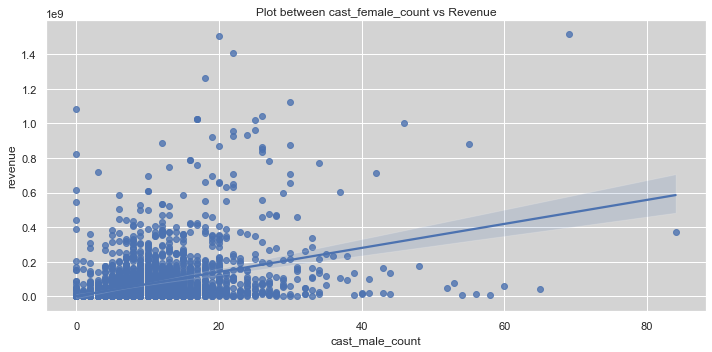

In [180]:
plt.figure(figsize=(10,5))
sns.regplot(x='cast_male_count',y='revenue',data=movies_train)
plt.title("Plot between cast_female_count vs Revenue" )
plt.tight_layout()
plt.show()

In both the cases of female and male cast count , there is a slight relation with the revenue 

#### 15. Crew

In [181]:
movies_train["crew"].describe()

count                                                  2984
unique                                                 2984
top       [{'credit_id': '59ac067c92514107af02c8c8', 'de...
freq                                                      1
Name: crew, dtype: object

There are 2984 entries and all are unique 

In [182]:
movies_train["crew"][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [183]:
movies_train["crew"]=movies_train["crew"].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
movies_test["crew"]=movies_test["crew"].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [184]:
movies_train["crew_name"]=movies_train["crew"].apply(convert)
movies_test["crew_name"]=movies_test["crew"].apply(convert)
movies_train["crew_name"]

0       [Kelly Cantley, Steve Pink, Josh Heald, Josh H...
1       [Garry Marshall, Charles Minsky, John Debney, ...
2       [Terri Taylor, Richard Henderson, Jeffrey Stot...
3                 [Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]
4                        [Jong-seok Yoon, Jong-seok Yoon]
                              ...                        
2995    [Dennis Hopper, Joe Batteer, John Rice, Joe Ba...
2996    [Imor Hermann, Anna Anthony, Lukas Moodysson, ...
2997    [Renny Harlin, Shane Black, Stephanie Austin, ...
2998    [Danny DeVito, Seamus McGarvey, Nick Moore, Th...
2999    [Joseph Middleton, Ed Shearmur, John Singleton...
Name: crew_name, Length: 3000, dtype: object

In [185]:
crew_namecount = dict()
for crewn in movies_train["crew_name"]:
    for i in crewn:
        if i not in crew_namecount:
            crew_namecount[i] = 1
        else:
            crew_namecount[i] += 1

In [186]:
crew_namecount=pd.DataFrame.from_dict(crew_namecount,orient="index")
crew_namecount.columns = ["number"]
crew_namecount=crew_namecount.sort_values(by="number",ascending=False).head(25)

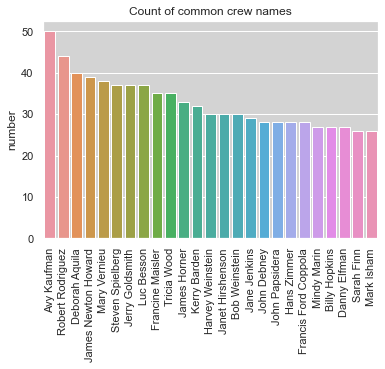

In [187]:
sns.barplot(x=crew_namecount.index,y=crew_namecount["number"])
plt.title("Count of common crew names")
plt.xticks(rotation=90)
plt.show()

These are the common crew person names from the columns

In [188]:
movies_train["gender_crew"]=movies_train["crew"].apply(gender_count)
movies_test["gender_crew"]=movies_test["crew"].apply(gender_count)
movies_train["gender_crew"]

0       [0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, ...
1                             [2, 2, 2, 1, 0, 2, 1, 1, 1]
2       [1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, ...
3                                               [0, 0, 0]
4                                                  [0, 0]
                              ...                        
2995    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, ...
2996        [0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2]
2997                       [2, 2, 1, 2, 2, 1, 2, 2, 0, 0]
2998    [2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, ...
2999    [2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, ...
Name: gender_crew, Length: 3000, dtype: object

In [189]:
gen_count = dict()
for genc in movies_train["gender_crew"]:
    for i in genc:
        if i not in gen_count:
            gen_count[i] = 1
        else:
            gen_count[i] += 1

In [190]:
gencount=pd.DataFrame.from_dict(gen_count,orient="index")
gencount.columns = ["number"]
gencount=gencount.sort_values(by="number",ascending=False)
gencount

number
0   41787
2   24898
1    6412

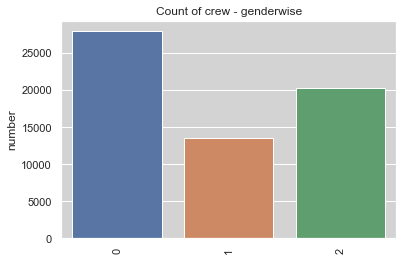

In [191]:
sns.barplot(x=gencount.index,y=gendercount["number"])
plt.title("Count of crew - genderwise")
plt.xticks(rotation=90)
plt.show()

0 is unspecified, 1 is female, and 2 is male - this is obtained from the kaggle book discussion 

So we can see that the male gender is more compared to Female . But unspecified tops the list

In [192]:
def department(obj):
    L=[]
    for i in obj:
        if obj!= {}:
            L.append(i["department"])
        else:
            continue
    return L

In [193]:
movies_train["department"]=movies_train["crew"].apply(department)
movies_test["department"]=movies_test["crew"].apply(department)
movies_train["department"]

0       [Directing, Directing, Writing, Writing, Produ...
1       [Directing, Camera, Sound, Production, Editing...
2       [Production, Sound, Production, Costume & Make...
3                        [Directing, Production, Writing]
4                                    [Directing, Writing]
                              ...                        
2995    [Directing, Writing, Writing, Writing, Writing...
2996    [Production, Production, Writing, Directing, P...
2997    [Directing, Writing, Production, Production, P...
2998    [Production, Camera, Editing, Sound, Productio...
2999    [Production, Sound, Directing, Editing, Costum...
Name: department, Length: 3000, dtype: object

In [194]:
dept_count = dict()
for dept in movies_train["department"]:
    for i in dept:
        if i not in dept_count:
            dept_count[i] = 1
        else:
            dept_count[i] += 1

In [195]:
dept_count=pd.DataFrame.from_dict(dept_count,orient="index")
dept_count.columns = ["number"]
dept_count=dept_count.sort_values(by="number",ascending=False)

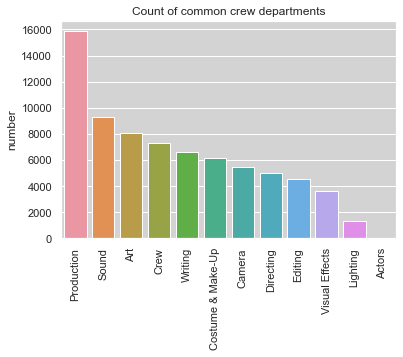

In [196]:
sns.barplot(x=dept_count.index,y=dept_count["number"])
plt.title("Count of common crew departments")
plt.xticks(rotation=90)
plt.show()

We can see that the most common crew department is Production,followed by Sound and Art

In [197]:
def job(obj):
    L=[]
    for i in obj:
        if obj!= {}:
            L.append(i["job"])
        else:
            continue
    return L

In [198]:
movies_train["job"]=movies_train["crew"].apply(job)
movies_test["job"]=movies_test["crew"].apply(job)

movies_train["job"]

0       [First Assistant Director, Director, Writer, C...
1       [Director, Director of Photography, Original M...
2       [Casting, Music Editor, Executive In Charge Of...
3                            [Director, Producer, Writer]
4                                      [Director, Writer]
                              ...                        
2995    [Director, Story, Story, Screenplay, Screenpla...
2996    [Casting, Co-Producer, Screenplay, Director, P...
2997    [Director, Screenplay, Producer, Producer, Pro...
2998    [Producer, Director of Photography, Editor, Or...
2999    [Casting, Original Music Composer, Director, E...
Name: job, Length: 3000, dtype: object

In [199]:
job_count = dict()
for job in movies_train["job"]:
    for i in job:
        if i not in job_count:
            job_count[i] = 1
        else:
            job_count[i] += 1

In [200]:
job_count=pd.DataFrame.from_dict(job_count,orient="index")
job_count.columns = ["number"]
job_count=job_count.sort_values(by="number",ascending=False).head(25)

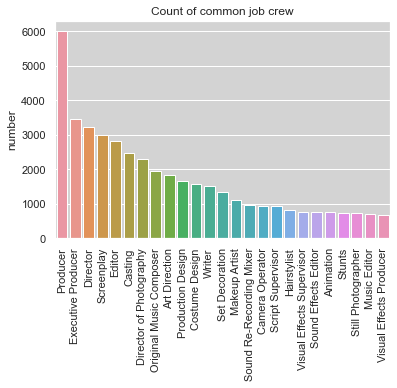

In [201]:
sns.barplot(x=job_count.index,y=job_count["number"])
plt.title("Count of common job crew")
plt.xticks(rotation=90)
plt.show()

The top 5 common jobs in crew are producer , Executive producer , Director followed by screenplay and editor

In [202]:
movies_train["crew_count"]=movies_train["job"].apply(lambda x: len(x))
movies_train["crew_female_count"] = movies_train["gender_crew"].apply(lambda x: sum([1 for i in x if i == 1]))
movies_train["crew_male_count"] = movies_train["gender_crew"].apply(lambda x: sum([1 for i in x if i == 2]))
movies_test["crew_count"]=movies_test["job"].apply(lambda x: len(x))
movies_test["crew_female_count"] = movies_test["gender_crew"].apply(lambda x: sum([1 for i in x if i == 1]))
movies_test["crew_male_count"] = movies_test["gender_crew"].apply(lambda x: sum([1 for i in x if i == 2]))

In [203]:
movies_train["crew_count"]

0       72
1        9
2       64
3        3
4        2
        ..
2995    17
2996    15
2997    10
2998    89
2999    48
Name: crew_count, Length: 3000, dtype: int64

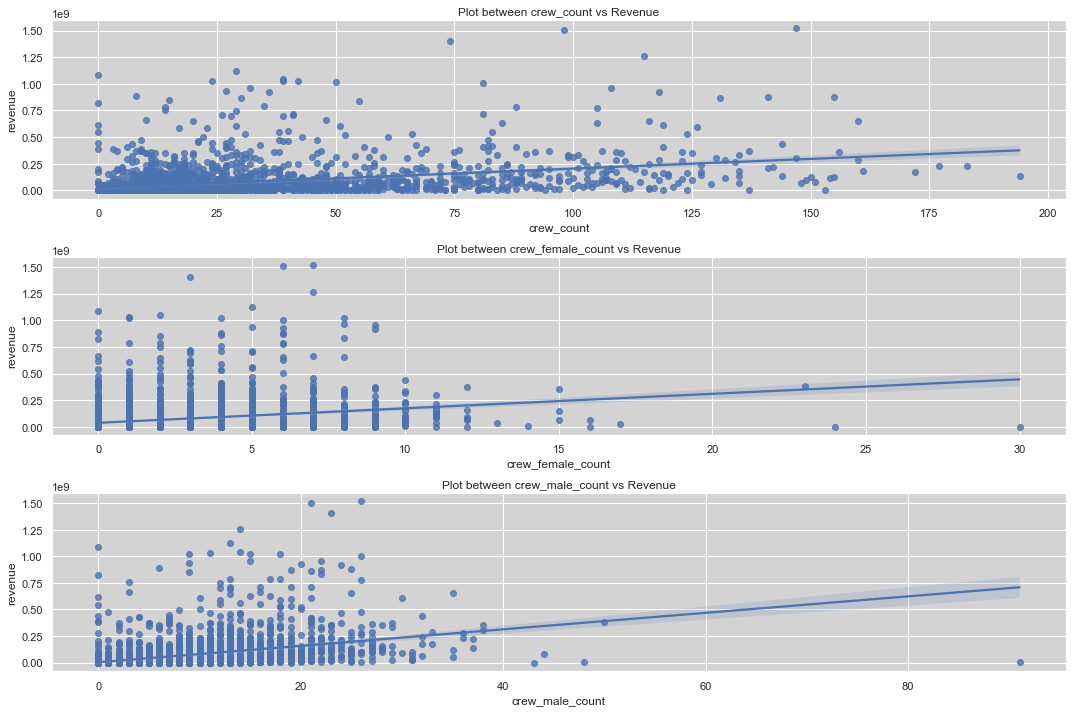

In [204]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.regplot(x='crew_count',y='revenue',data=movies_train)
plt.title("Plot between crew_count vs Revenue" )


plt.subplot(3,1,2)
sns.regplot(x='crew_female_count',y='revenue',data=movies_train)
plt.title("Plot between crew_female_count vs Revenue" )


plt.subplot(3,1,3)
sns.regplot(x='crew_male_count',y='revenue',data=movies_train)
plt.title("Plot between crew_male_count vs Revenue" )

plt.tight_layout()
plt.show()


There are small positive correlations with the revenue for the crew count , female crew count and male crew count 

#### 16. Release date

In [205]:
movies_train["release_date"].describe()

count        3000
unique       2398
top       9/10/10
freq            5
Name: release_date, dtype: object

There are no null values in release date and there are 2398 unique values in dataset

In [206]:
def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df['week']=df['release_date'].dt.week
    df['dayofweek']=df['release_date'].dt.dayofweek
    return df

date_features(movies_train)
date_features(movies_test)
movies_train["release_year"].head(20)

C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\821555066.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['release_date'].dt.week
C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\821555066.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['release_date'].dt.week


0     2015
1     2004
2     2014
3     2012
4     2009
5     1987
6     2012
7     2004
8     1996
9     2003
10    1976
11    1987
12    1999
13    2005
14    2002
15    2010
16    2005
17    2013
18    2011
19    2005
Name: release_year, dtype: int64

In [207]:
movies_train['release_year'].iloc[np.where(movies_train['release_year']> 2019)].value_counts()


2070    8
2060    8
2067    8
2071    8
2066    7
2068    7
2055    7
2054    6
2048    6
2069    6
2064    6
2053    6
2063    5
2062    5
2059    5
2051    4
2061    4
2036    4
2039    4
2045    4
2065    4
2056    4
2058    3
2057    3
2028    3
2042    3
2032    3
2033    2
2043    2
2050    2
2025    2
2047    2
2031    2
2049    2
2040    2
2044    2
2027    2
2026    1
2030    1
2052    1
2038    1
2021    1
2035    1
2024    1
Name: release_year, dtype: int64

We can see that there are many rows which have year which are in future , we can either delete them or make them as 1900's movies.Checked some movies in above list and those were released in 1900's . So we can convert them to 1900's

In [208]:
movies_train['release_year']=np.where(movies_train['release_year']> 2019,movies_train['release_year']-100,movies_train['release_year'])
movies_test['release_year']=np.where(movies_test['release_year']> 2019,movies_test['release_year']-100,movies_test['release_year'])

In [209]:
movies_train['release_year'].iloc[np.where(movies_train['release_year']> 2019)].value_counts()

Series([], Name: release_year, dtype: int64)

We can see that we have handled all the data which had year more than 2022 

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


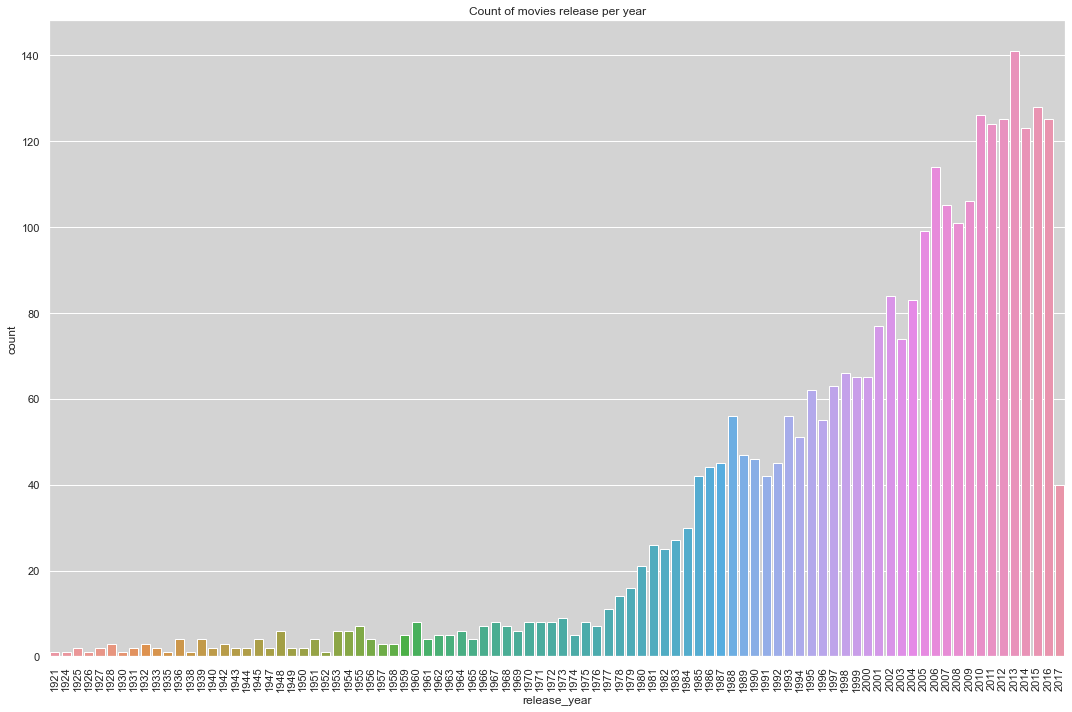

In [210]:
plt.figure(figsize=(15,10))
sns.countplot(movies_train['release_year'])
plt.title("Count of movies release per year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see that over the years , movie release count has increased or either the dataset is highly concentrated with movies released in the later part after 1990's

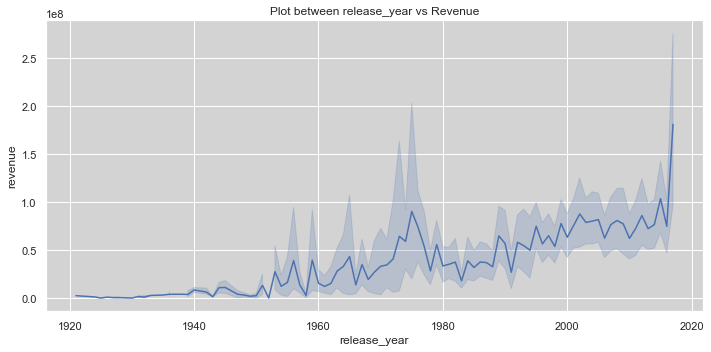

In [211]:
plt.figure(figsize=(10,5))
sns.lineplot(x='release_year',y='revenue',data=movies_train)
plt.title("Plot between release_year vs Revenue" )
plt.tight_layout()
plt.show()

Since the movies number has increased , revenue has also increased over the years. THere has been minor fluctuations throughout the years

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


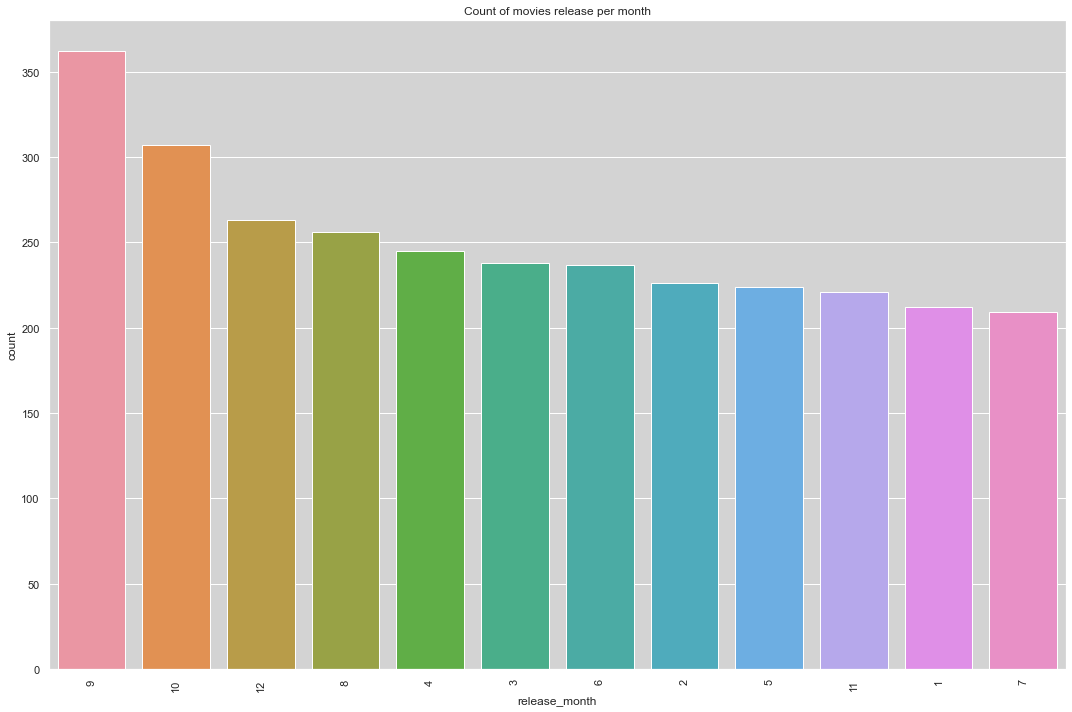

In [212]:
plt.figure(figsize=(15,10))
sns.countplot(movies_train['release_month'],order = movies_train['release_month'].value_counts().index)
plt.title("Count of movies release per month")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- We can see that September month has had the most number of released followed by october and December 
- Lowest release is on July month

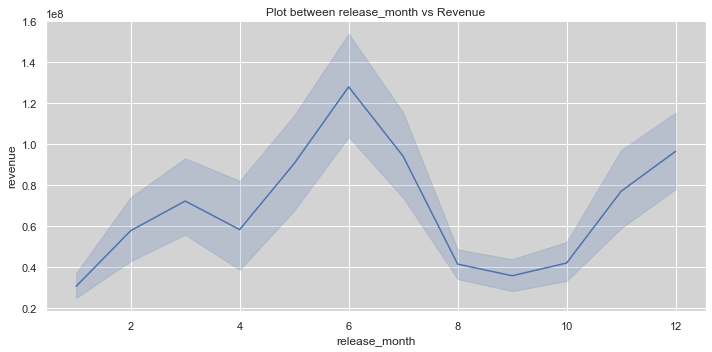

In [213]:
plt.figure(figsize=(10,5))
sns.lineplot(x='release_month',y='revenue',data=movies_train)
plt.title("Plot between release_month vs Revenue" )
plt.tight_layout()
plt.show()

- Even though , number of released are more in september , the revenue generated is less 
- The revenue generated is more for months of May , June , July are the highest  and there is also a increase in December which might be due to vacation period

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


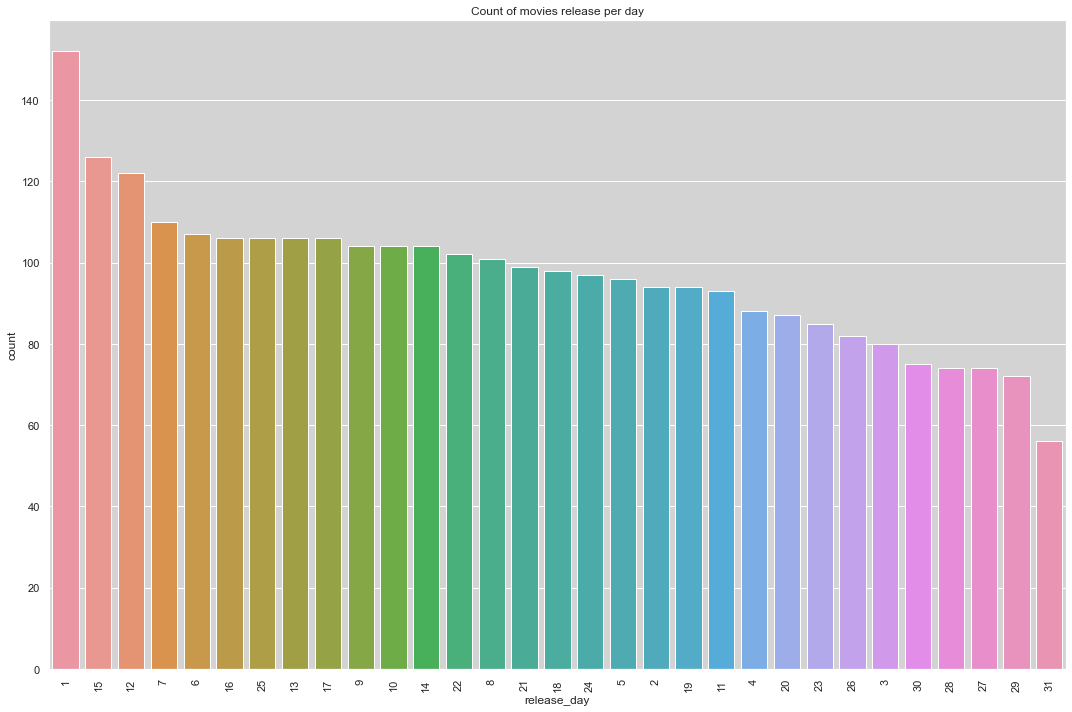

In [214]:
plt.figure(figsize=(15,10))
sns.countplot(movies_train['release_day'],order = movies_train['release_day'].value_counts().index)
plt.title("Count of movies release per day")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the graph , we can see that 1st day of month has had most releases followed by 15 and 12. 

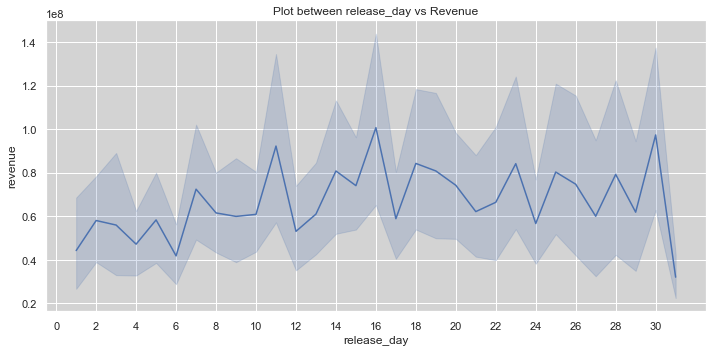

In [215]:
plt.figure(figsize=(10,5))
sns.lineplot(x='release_day',y='revenue',data=movies_train)
plt.title("Plot between release_day vs Revenue" )
plt.xticks(np.arange(0,31,2))
plt.tight_layout()
plt.show()

But revenue generated is more for movies released on 11th, 16th , 23th and 30th - which has no relation with the number of movies released 

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


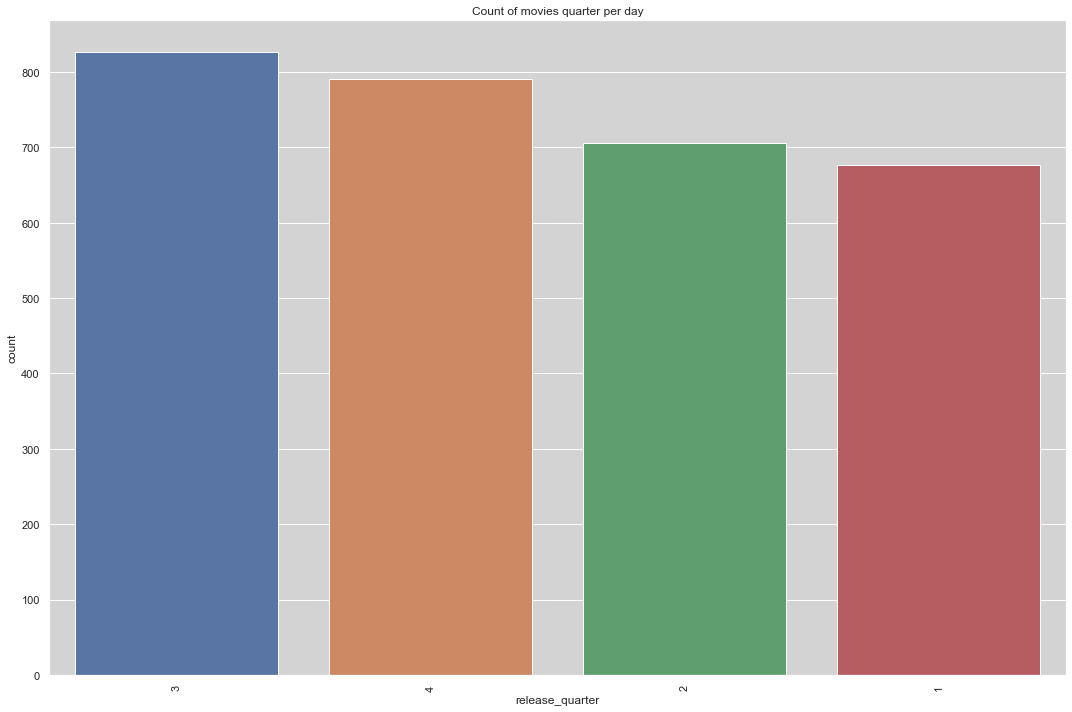

In [216]:
plt.figure(figsize=(15,10))
sns.countplot(movies_train['release_quarter'],order = movies_train['release_quarter'].value_counts().index)
plt.title("Count of movies quarter per day")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3rd and 4th quarter have the maximum released which corresponds to the maximum releases per month data

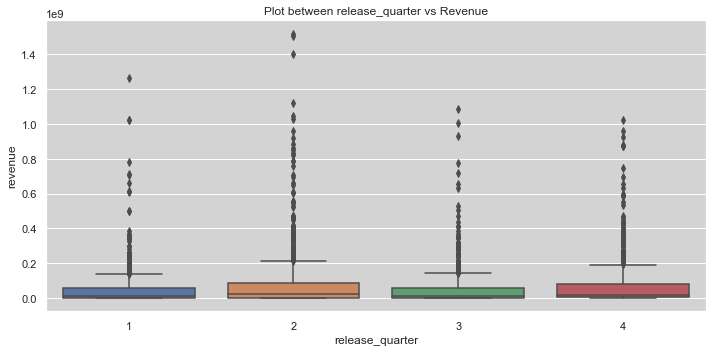

In [217]:
plt.figure(figsize=(10,5))
sns.boxplot(x='release_quarter',y='revenue',data=movies_train)
plt.title("Plot between release_quarter vs Revenue" )
plt.tight_layout()
plt.show()

- But revenue generated is more for 2nd quarter followed by 4th
- 1st and 3rd quarter have almost same revenue 

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


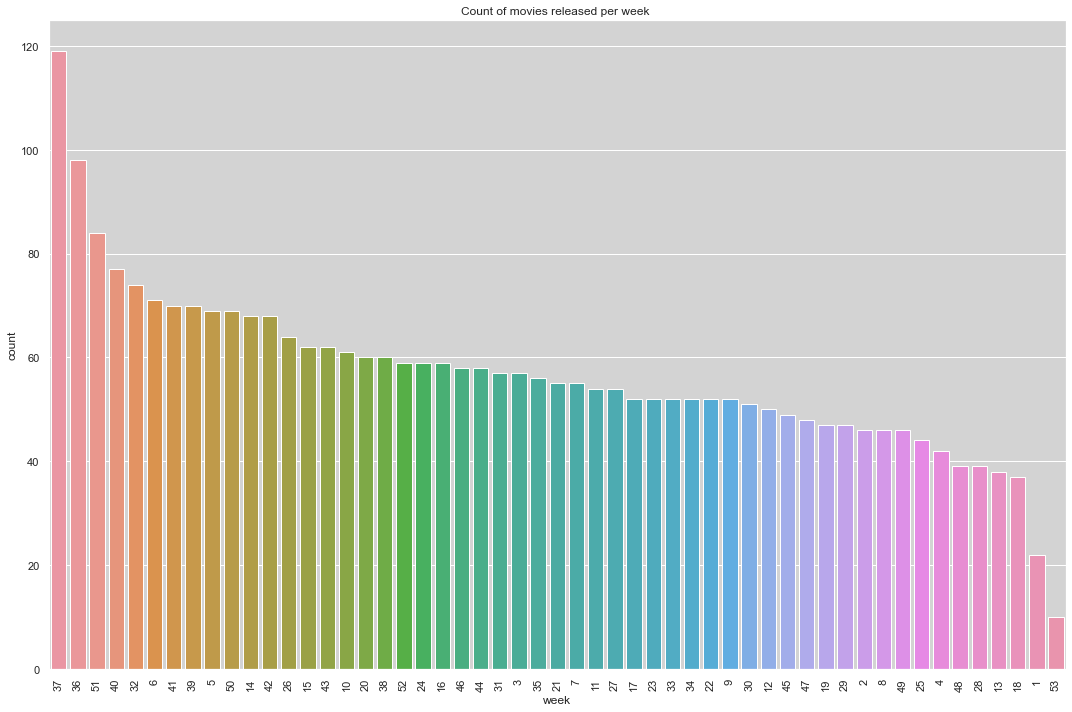

In [218]:
plt.figure(figsize=(15,10))
sns.countplot(movies_train['week'],order = movies_train['week'].value_counts().index)
plt.title("Count of movies released per week ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The Week 37,36 comes in september which corresponds to the previous plot of september having high releases and week 51 comes in december which had also high releases

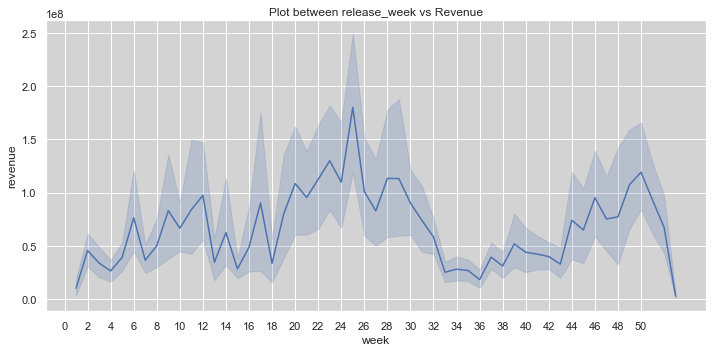

In [219]:
plt.figure(figsize=(10,5))
sns.lineplot(x='week',y='revenue',data=movies_train)
plt.title("Plot between release_week vs Revenue" )
plt.xticks(np.arange(0,52,2))
plt.tight_layout()
plt.show()

But revenue wise , week 25 has high revenue followed by Week 23 , Week 49  and week 20 so on

Week 25,23,20 comes in June which again corresponds to the previous plot of june getting maximum revenue 

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


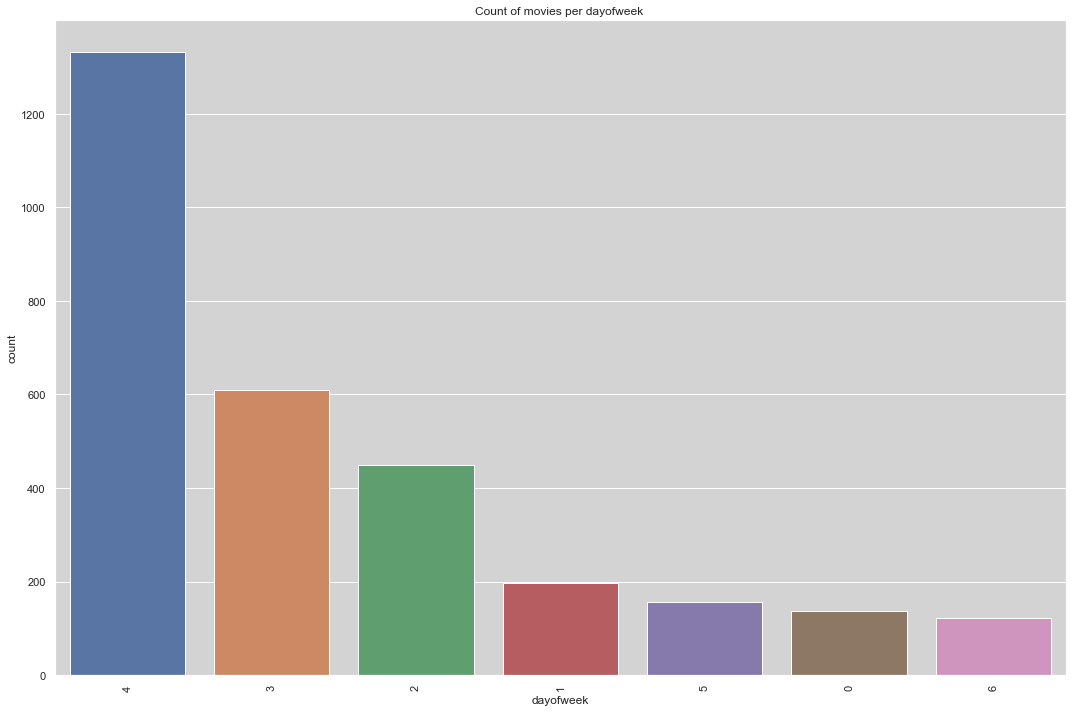

In [220]:
plt.figure(figsize=(15,10))
sns.countplot(movies_train['dayofweek'],order = movies_train['dayofweek'].value_counts().index)
plt.title("Count of movies per dayofweek ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here 0 denotes monday and 6 denotes sunday - so we have had maximum released on Friday and Thrusdays which are near to weekends

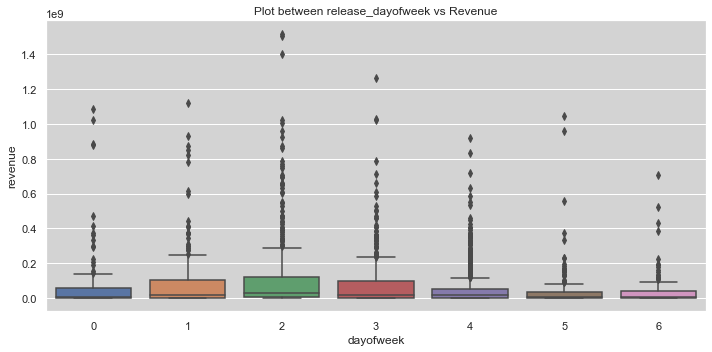

In [221]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dayofweek',y='revenue',data=movies_train)
plt.title("Plot between release_dayofweek vs Revenue" )
plt.tight_layout()
plt.show()

Revenue wise wednesday have generated more , followed by tuesday and thursday

# PREPROCESSING

1.Missing Value Handling

In [222]:
movies_train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      0
homepage                 2054
                         ... 
release_month               0
release_day                 0
release_quarter             0
week                        0
dayofweek                   0
Length: 67, dtype: int64

In [223]:
movies_test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                      0
homepage                 2978
                         ... 
release_month               1
release_day                 1
release_quarter             1
week                        1
dayofweek                   1
Length: 64, dtype: int64

In [224]:
cols_with_missing=[col for col in movies_train.columns
                  if movies_train[col].isnull().any()]
cols_with_missing

['belongs_to_collection', 'homepage', 'poster_path', 'runtime']

In [225]:
cols_with_missing1=[col for col in movies_test.columns
                  if movies_test[col].isnull().any()]
cols_with_missing1

['belongs_to_collection',
 'homepage',
 'poster_path',
 'release_date',
 'runtime',
 'status',
 'title',
 'release_year',
 'release_month',
 'release_day',
 'release_quarter',
 'week',
 'dayofweek']

In [226]:
movies_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'revenue_log', 'budget_log', 'popularity_log', 'homepage_available',
       'English Language or not', 'original_title_letter_count',
       'original_title_word_count', 'count_of_overview_letter',
       'count_of_tagline_words', 'has_tagline', 'title_letter_count',
       'title_word_count', 'isTitleDifferent', 'collection_name',
       'part of collection', 'genre_name', 'genre_count',
       'production_companies_name', 'production_companies_count',
       'production_countries_name', 'production_countries_count',
       'spoken_languages_name', 'spoken_languages_count', 'Keywords_name',
       'Keywords_count', 'cast_name', 'ge

In [227]:
movies_test.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'budget_log',
       'popularity_log', 'homepage_available', 'English Language or not',
       'original_title_letter_count', 'original_title_word_count',
       'count_of_overview_letter', 'count_of_tagline', 'has_tagline',
       'title_letter_count', 'title_word_count', 'collection_name',
       'part of collection', 'genre_name', 'genre_count',
       'production_companies_name', 'production_companies_count',
       'production_countries_name', 'production_countries_count',
       'spoken_languages_name', 'spoken_languages_count', 'Keywords_name',
       'Keywords_count', 'cast_name', 'gender_class', 'character_count',
       'cast_count', 'cast_

In [228]:
#Genres


In [229]:
movies_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

7 null values are in Genres Which we handeled by actual values which we found from google

In [230]:
movies_train[movies_train['genre_count']==0].original_title

470     The Book of Mormon Movie, Volume 1: The Journey
1622                                            Jackpot
1814                                       Курочка Ряба
1819                            Небо. Самолёт. Девушка.
2423                                          Amarkalam
2686                                               Лифт
2900                            Poslednyaya skazka Rity
Name: original_title, dtype: object

In [231]:
movies_train.at[470,"genre_name"]=["Drama","Adventure"]
movies_train.at[1622,"genre_name"]=["Drama","Comedy"]
movies_train.at[1814,"genre_name"]=["Comedy","Fantasy"]
movies_train.at[1819,"genre_name"]=["Drama","Romance"]
movies_train.at[2423,"genre_name"]=["Action","Romance"]
movies_train.at[2686,"genre_name"]=["Thriller"]
movies_train.at[2900,"genre_name"]=["Drama","Fantasy"]

In [232]:
movies_train['genre_count']=movies_train['genre_name'].apply(lambda x:len(x))

In [233]:
movies_train[movies_train['genre_count']==0]

Empty DataFrame
Columns: [id, belongs_to_collection, budget, genres, homepage, imdb_id, original_language, original_title, overview, popularity, poster_path, production_companies, production_countries, release_date, runtime, spoken_languages, status, tagline, title, Keywords, cast, crew, revenue, revenue_log, budget_log, popularity_log, homepage_available, English Language or not, original_title_letter_count, original_title_word_count, count_of_overview_letter, count_of_tagline_words, has_tagline, title_letter_count, title_word_count, isTitleDifferent, collection_name, part of collection, genre_name, genre_count, production_companies_name, production_companies_count, production_countries_name, production_countries_count, spoken_languages_name, spoken_languages_count, Keywords_name, Keywords_count, cast_name, gender_class, character_count, cast_count, cast_female_count, cast_male_count, crew_name, gender_crew, department, job, crew_count, crew_female_count, crew_male_count, release_year, release_month, release_day, release_quarter, week, dayofweek]
Index: []

[0 rows x 67 columns]

In [234]:
#Same doing in test data

In [235]:
movies_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    1407
3    1308
1     895
4     574
5     169
6      27
0      16
7       1
8       1
Name: genres, dtype: int64

16 null values are present in genres column

In [236]:
movies_test[movies_test['genre_count']==0].original_title

73                 Dangerously Close
793                   Table For Five
910                        Valentino
1221                   Street Knight
1442                              아들
1615        Наша Russia: Яйца судьбы
1964        Антикиллер 2: Антитеррор
2062                              15
2118                      Duniyadari
2213               Praying With Lior
2251             Teddy Bears' Picnic
2519                  Glukhar v kino
3449                      Lucky Lady
3485              Death of a Dynasty
3564                 Fahrenheit 9/11
3817    Miesten välisiä keskusteluja
Name: original_title, dtype: object

Filling those with actual values

In [237]:
movies_test.at[73,"genre_name"]=["Drama","Action","Thriller"]
movies_test.at[793,"genre_name"]=["Drama"]
movies_test.at[910,"genre_name"]=["Drama"]
movies_test.at[1221,"genre_name"]=["Drama","Action"]
movies_test.at[1442,"genre_name"]=["Horror","Mystery""Thriller"]
movies_test.at[1615,"genre_name"]=["Comedy"]
movies_test.at[1964,"genre_name"]=["Action","Crime"]
movies_test.at[2062,"genre_name"]=["Drama","Crime"]
movies_test.at[2118,"genre_name"]=["Drama"]
movies_test.at[2213,"genre_name"]=["Family","Documentry"]
movies_test.at[2251,"genre_name"]=["Comedy"]
movies_test.at[2519,"genre_name"]=["Comedy","Crime","Mystery"]
movies_test.at[3449,"genre_name"]=["Drama","Comedy"]
movies_test.at[3564,"genre_name"]=["Drama","documentry","War"]
movies_test.at[3485,"genre_name"]=["Musical","Comedy"]
movies_test.at[3817,"genre_name"]=["Drama"]



In [238]:
movies_test['genre_count']=movies_test['genre_name'].apply(lambda x:len(x))

In [239]:
movies_test['genre_name'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    1414
3    1311
1     901
4     574
5     169
6      27
7       1
8       1
Name: genre_name, dtype: int64

In [240]:
#Spoken language

In [241]:
movies_train['spoken_languages_count'].value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages_count, dtype: int64

20 Null Values are in Spoken Language

In [242]:
movies_train[movies_train['spoken_languages_count']==0].original_title

150                                          Windwalker
177                                         Boys Life 2
454                                  Sweet Hearts Dance
470     The Book of Mormon Movie, Volume 1: The Journey
979                                            Russkies
1101                                         Crazy Love
1333                          One Bright Shining Moment
1335                                            Королёв
1483                                 The Wedding Ringer
1503                                         Campus Man
1537                                        Planet Hulk
1622                                            Jackpot
1648                                            Squeeze
1760                                Across to Singapore
1917                                    The Merry Widow
1923                                               OPA!
2427                                             Joshua
2629           Homeward Bound II: Lost in San Fr

In [243]:
movies_train.at[150,"spoken_languages_name"]=["English","Cheyenne","Crow"]
movies_train.at[177,"spoken_languages_name"]=["English"]
movies_train.at[454,"spoken_languages_name"]=["English"]
movies_train.at[470,"spoken_languages_name"]=["English"]
movies_train.at[979,"spoken_languages_name"]=["English"]
movies_train.at[1101,"spoken_languages_name"]=["English","Italiano","Nederlands"]
movies_train.at[1333,"spoken_languages_name"]=["English"]
movies_train.at[1335,"spoken_languages_name"]=["Pусский"]
movies_train.at[1483,"spoken_languages_name"]=["English","Український"]
movies_train.at[1503,"spoken_languages_name"]=["English"]
movies_train.at[1537,"spoken_languages_name"]=["English"]
movies_train.at[1622,"spoken_languages_name"]=["English"]
movies_train.at[1648,"spoken_languages_name"]=["English"]
movies_train.at[1760,"spoken_languages_name"]=["English"]
movies_train.at[1917,"spoken_languages_name"]=["English"]
movies_train.at[1923,"spoken_languages_name"]=["English"]
movies_train.at[2427,"spoken_languages_name"]=["English"]
movies_train.at[2629,"spoken_languages_name"]=["English"]
movies_train.at[2686,"spoken_languages_name"]=["Pусский"]
movies_train.at[2785,"spoken_languages_name"]=["Français"]

In [244]:
movies_train['spoken_languages_count']=movies_train['spoken_languages_name'].apply(lambda x:len(x))

In [245]:
#For test data

In [246]:
movies_test['spoken_languages_count'].value_counts()

1    3121
2     770
3     286
4     106
5      50
0      42
6      19
8       2
9       2
Name: spoken_languages_count, dtype: int64

In [247]:
movies_test[movies_test['spoken_languages_count']==0].original_title

83                                    The Mysterious Lady
336                                            The Source
812                                             The Cheat
828                            Jails, Hospitals & Hip-Hop
830                                    Falling From Grace
880                           Dr. Bronner's Magic Soapbox
1056                                               Stevie
1104                                          Willy/Milly
1475                         Jimmy Carter Man from Plains
1507                                              Camilla
1533                                          Brown Sugar
1838                                         Bran Nue Dae
1840                                   Festival in Cannes
1850                                   Prince of Broadway
1940                                   Mr. Saturday Night
1968                         Beyond the Gates of Splendor
2127                                                Trois
2213          

In [248]:
movies_test.at[2398,"spoken_languages_name"]=["Japanese"]
movies_test.at[2425,"spoken_languages_name"]=["French"]
movies_test.at[3582,"spoken_languages_name"]=["Russian"]
movies_test.at[4353,"spoken_languages_name"]=["Filipino","Tagalog"]






In [249]:
sl_null=movies_test.index[movies_test['spoken_languages_count'].apply(lambda x: x==0)].tolist()
for i in sl_null:
    movies_test.at[i,'spoken_languages_name']=['English']    

In [250]:
movies_test['spoken_languages_count']=movies_test['spoken_languages_name'].apply(lambda x:len(x))

In [251]:
movies_test['spoken_languages_count'].value_counts()

1    3163
2     770
3     286
4     106
5      50
6      19
8       2
9       2
Name: spoken_languages_count, dtype: int64

In [252]:
#Runtime

In [253]:
movies_train[movies_train['runtime'].isna()]

id belongs_to_collection   budget                          genres  \
1335  1336                   NaN  6000000   [{'id': 18, 'name': 'Drama'}]   
2302  2303                   NaN  8000000  [{'id': 35, 'name': 'Comedy'}]   

     homepage    imdb_id original_language original_title overview  \
1335      NaN  tt1107828                ru        Королёв            
2302      NaN  tt0116485                de  Happy Weekend            

      popularity  ...                 job crew_count crew_female_count  \
1335    0.292296  ...  [Director, Writer]          2                 0   
2302    0.002229  ...                  []          0                 0   

     crew_male_count  release_year release_month release_day release_quarter  \
1335               2          2007            10          29               4   
2302               0          1996             3          14               1   

     week dayofweek  
1335   44         0  
2302   11         3  

[2 rows x 67 columns]

In [254]:

movies_train.at[1335,"runtime"]=130
movies_train.at[2302,"runtime"]=90

In [255]:
#Test data

In [256]:
movies_test[movies_test['runtime'].isna()].original_title

243        La caliente niña Julietta
1489     Pancho, el perro millonario
1632         Nunca en horas de clase
3817    Miesten välisiä keskusteluja
Name: original_title, dtype: object

In [257]:
movies_test.at[243,"runtime"]=93
movies_test.at[1489,"runtime"]=91
movies_test.at[1632,"runtime"]=100
movies_test.at[3817,"runtime"]=90


In [258]:
#Release_date

In [259]:
movies_test[movies_test['release_date'].isnull()]

id belongs_to_collection   budget                         genres  \
828  3829                   NaN  7450000  [{'id': 18, 'name': 'Drama'}]   

    homepage    imdb_id original_language              original_title  \
828      NaN  tt0210130                en  Jails, Hospitals & Hip-Hop   

                                              overview  popularity  ... job  \
828  Jails, Hospitals &amp; Hip-Hop is a cinematic ...    0.009057  ...  []   

    crew_count crew_female_count crew_male_count  release_year release_month  \
828          0                 0               0           NaN           NaN   

    release_day release_quarter week dayofweek  
828         NaN             NaN  NaN       NaN  

[1 rows x 64 columns]

In [260]:
#fill the release data by 05/01/2000 which found from google
movies_test.loc[movies_test['release_date'].isnull()==True,'release_date']='5/1/2000'

In [261]:
movies_test.loc[828,'release_year']='2000'
movies_test.loc[828,'release_month']='5'
movies_test.loc[828,'release_day']='1'
movies_test.loc[828,'release_quarter']='2'
movies_test.loc[828,'release_dayofweek']='6'


OUTLIER HANDLING

In [262]:
movies_train.describe()

id        budget   popularity      runtime       revenue  \
count  3000.000000  3.000000e+03  3000.000000  3000.000000  3.000000e+03   
mean   1500.500000  2.469667e+07     8.463274   108.274000  6.672585e+07   
std     866.169729  3.586030e+07    12.104000    21.002205  1.375323e+08   
min       1.000000  1.000000e+00     0.000001    11.000000  1.000000e+00   
25%     750.750000  8.000000e+06     4.018053    94.000000  2.379808e+06   
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07   
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07   
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09   

       revenue_log   budget_log  popularity_log  homepage_available  \
count  3000.000000  3000.000000     3000.000000         3000.000000   
mean     15.959894    16.179254        1.701931            0.315333   
std       3.071323     1.754828        1.171632            0.464726   
min       0.000000     0.000000      -13.815511            0.000000   
25%      14.682516    15.894952        1.390797            0.000000   
50%      16.637310    15.894952        1.998076            0.000000   
75%      18.048445    17.182806        2.387935            1.000000   
max      21.141685    19.755682        5.684725            1.000000   

       English Language or not  ...  cast_male_count   crew_count  \
count              3000.000000  ...      3000.000000  3000.000000   
mean                  0.858333  ...         9.316333    24.365667   
std                   0.348766  ...         7.374804    28.066419   
min                   0.000000  ...         0.000000     0.000000   
25%                   1.000000  ...         5.000000     8.000000   
50%                   1.000000  ...         8.000000    14.000000   
75%                   1.000000  ...        12.000000    28.000000   
max                   1.000000  ...        84.000000   194.000000   

       crew_female_count  crew_male_count  release_year  release_month  \
count        3000.000000      3000.000000   3000.000000    3000.000000   
mean            2.137333         8.299333   1999.713000       6.775333   
std             2.698932         6.777933     15.423313       3.409115   
min             0.000000         0.000000   1921.000000       1.000000   
25%             0.000000         3.000000   1993.000000       4.000000   
50%             1.000000         7.000000   2004.000000       7.000000   
75%             3.000000        11.000000   2011.000000      10.000000   
max            30.000000        91.000000   2017.000000      12.000000   

       release_day  release_quarter         week    dayofweek  
count  3000.000000      3000.000000  3000.000000  3000.000000  
mean     15.046333         2.577667    27.820333     3.253000  
std       8.632981         1.105611    14.844376     1.330757  
min       1.000000         1.000000     1.000000     0.000000  
25%       8.000000         2.000000    15.000000     2.000000  
50%      15.000000         3.000000    29.000000     4.000000  
75%      22.000000         4.000000    40.000000     4.000000  
max      31.000000         4.000000    53.000000     6.000000  

[8 rows x 36 columns]

Text(0, 0.5, 'No of Movies')

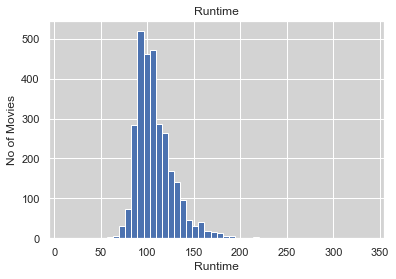

In [263]:
figure=movies_train.runtime.hist(bins=50)
figure.set_title('Runtime')
figure.set_xlabel('Runtime')
figure.set_ylabel('No of Movies')

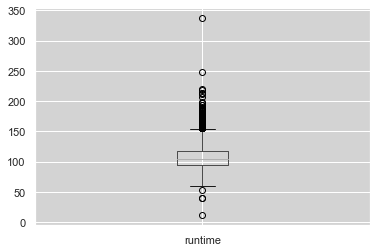

In [264]:
figure=movies_train.boxplot(column="runtime")

In [265]:
movies_train['runtime'].describe()

count    3000.000000
mean      108.274000
std        21.002205
min        11.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [266]:
#### Extreme outlier
IQR=IQR=movies_train['runtime'].quantile(0.90)-movies_train['runtime'].quantile(0.25)
lower_bridge=movies_train['runtime'].quantile(0.90)-(IQR*3)
upper_bridge=movies_train['runtime'].quantile(0.90)+(IQR*3)
print(lower_bridge), print(upper_bridge)


14.0
254.0


(None, None)

In [267]:
movies_train[movies_train['runtime']>254].runtime

1211    338.0
Name: runtime, dtype: float64

In [268]:
movies_train.loc[movies_train['runtime']>=254,'runtime']=254
movies_train.loc[movies_train['runtime']<=14,'runtime']=14

In [269]:
movies_train['runtime'].describe()

count    3000.000000
mean      108.247000
std        20.745701
min        14.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       254.000000
Name: runtime, dtype: float64

In [270]:
#For test data


Text(0, 0.5, 'No of Movies')

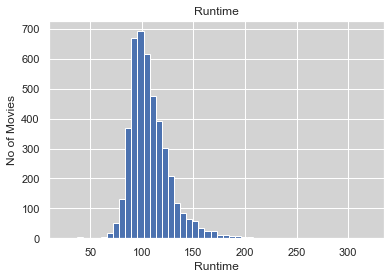

In [271]:
figure=movies_test.runtime.hist(bins=50)
figure.set_title('Runtime')
figure.set_xlabel('Runtime')
figure.set_ylabel('No of Movies')

In [272]:
movies_test['runtime'].describe()

count    4398.000000
mean      107.822192
std        20.482251
min        25.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       320.000000
Name: runtime, dtype: float64

In [273]:
#### Extreme outlier
IQR=IQR=movies_test['runtime'].quantile(0.90)-movies_test['runtime'].quantile(0.25)
lower_bridge1=movies_test['runtime'].quantile(0.90)-(IQR*3)
upper_bridge1=movies_test['runtime'].quantile(0.90)+(IQR*3)
print(lower_bridge1), print(upper_bridge1)


16.0
250.0


(None, None)

In [274]:
movies_test[movies_test['runtime']>254].runtime

2710    320.0
Name: runtime, dtype: float64

In [275]:
movies_test[movies_test['runtime']<16].runtime

Series([], Name: runtime, dtype: float64)

In [276]:
movies_test.loc[movies_test['runtime']>=250,'runtime']=250
movies_test.loc[movies_test['runtime']<=16,'runtime']=16

In [277]:
movies_test['runtime'].describe()

count    4398.000000
mean      107.805366
std        20.337618
min        25.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       250.000000
Name: runtime, dtype: float64

Feature Enginearing

In [278]:
w_revenue=movies_train.id[movies_train.budget > 1000][movies_train.revenue < 100]
for i in w_revenue:
    movies_train.loc[movies_train['id']==i,'revenue'] =movies_train.loc[movies_train['id']==i,'revenue'] * 1000000
    

In [279]:
#creating new features as interaction between some features some of them make little sence 
#but may be they could improve the model 
movies_train['budget_runtime_ratio']=movies_train['budget_log']/movies_train['runtime']
movies_test['budget_runtime_ratio']=movies_test['budget_log']/movies_test['runtime']
movies_train['budget_popularity_ratio']=movies_train['budget_log']/movies_train['popularity_log']
movies_test['budget_popularity_ratio']=movies_test['budget_log']/movies_test['popularity_log']

In [280]:
movies_train['popularity_mean_year']=movies_train['popularity_log']/movies_train.groupby('release_year')['popularity_log'].transform('mean')
movies_test['popularity_mean_year']=movies_test['popularity_log']/movies_test.groupby('release_year')['popularity_log'].transform('mean')


In [281]:
movies_train['runtime_mean_year']=movies_train['runtime']/movies_train.groupby('release_year')['runtime'].transform('mean')
movies_test['runtime_mean_year']=movies_test['runtime']/movies_test.groupby('release_year')['runtime'].transform('mean')
movies_train['popularity_mean_year']=movies_train['popularity_log']/movies_train.groupby('release_year')['popularity_log'].transform('mean')
movies_test['popularity_mean_year']=movies_test['popularity_log']/movies_test.groupby('release_year')['popularity_log'].transform('mean')
movies_train['budget_mean_year']=movies_train['budget_log']/movies_train.groupby('release_year')['budget_log'].transform('mean')
movies_test['budget_mean_year']=movies_test['budget_log']/movies_test.groupby('release_year')['budget_log'].transform('mean')




In [282]:
movies_train['femalecast per mean cast in release year']=movies_train['cast_female_count']/movies_train.groupby("release_year")['cast_count'].transform('mean')
movies_train['malecast per mean cast in release year']=movies_train['cast_male_count']/movies_train.groupby("release_year")['cast_count'].transform('mean')
movies_train['femalecrew per mean crew in release year']=movies_train['crew_female_count']/movies_train.groupby("release_year")['crew_count'].transform('mean')
movies_train['malecrew per mean crew in release year']=movies_train['crew_male_count']/movies_train.groupby("release_year")['crew_count'].transform('mean')
movies_test['femalecast per mean cast in release year']=movies_test['cast_female_count']/movies_test.groupby("release_year")['cast_count'].transform('mean')
movies_test['malecast per mean cast in release year']=movies_test['cast_male_count']/movies_test.groupby("release_year")['cast_count'].transform('mean')
movies_test['femalecrew per mean crew in release year']=movies_test['crew_female_count']/movies_test.groupby("release_year")['crew_count'].transform('mean')
movies_test['malecrew per mean crew in release year']=movies_test['crew_male_count']/movies_test.groupby("release_year")['crew_count'].transform('mean')


In [283]:
list_of_crew_departments = list(movies_train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
list_of_crew_jobs = list(movies_train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
test_list_of_crew_departments = list(movies_test['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
test_list_of_crew_jobs = list(movies_test['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)

In [284]:
from collections import Counter
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    movies_train['jobs_' + j] = movies_train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    movies_train['departments_' + j] = movies_train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

In [285]:
top_crew_jobs = [m[0] for m in Counter([i for j in test_list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    movies_test['jobs_' + j] = movies_test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in test_list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    movies_test['departments_' + j] = movies_test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

Encoding

In [286]:
movies_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=103)

In [287]:
#Genre

In [288]:
genres_name_count

number_of_movies
Drama                        1531
Comedy                       1028
Thriller                      789
Action                        741
Romance                       571
Crime                         469
Adventure                     439
Horror                        301
Science Fiction               290
Family                        260
Fantasy                       232
Mystery                       225
Animation                     141
History                       132
War                           100
Music                         100
Documentary                    87
Western                        43
Foreign                        31
TV Movie                        1

In [289]:
top_genres_train=genres_name_count

In [290]:
for g in top_genres_train.index:
    movies_train['genre_' + g] = movies_train['genre_name'].apply(lambda x: 1 if g in x else 0)

In [291]:
top_genres_test=genres_name_count_test

In [292]:
for g in top_genres_test.index:
    movies_test['genre_' + g] = movies_test['genre_name'].apply(lambda x: 1 if g in x else 0)

In [293]:
movies_train.head(1)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   

                           genres homepage    imdb_id original_language  \
0  [{'id': 35, 'name': 'Comedy'}]      NaN  tt2637294                en   

           original_title                                           overview  \
0  Hot Tub Time Machine 2  When Lou, who has become the "father of the In...   

   popularity  ... genre_Fantasy genre_Mystery genre_Animation genre_History  \
0    6.575393  ...             0             0               0             0   

   genre_War genre_Music genre_Documentary genre_Western genre_Foreign  \
0          0           0                 0             0             0   

  genre_TV Movie  
0              0  

[1 rows x 123 columns]

In [294]:
#production_companies

In [295]:
prod_com_namecount[prod_com_namecount['number_of_movies']>30].count()

number_of_movies    17
dtype: int64

In [296]:
top_prod_com_train=prod_com_namecount.head(20)

In [297]:
for g in top_prod_com_train.index:
    movies_train['production_company_' + g] = movies_train['production_companies_name'].apply(lambda x: 1 if g in x else 0)

In [298]:
#For test

In [299]:
prod_com_namecount_test[prod_com_namecount_test['number_of_movies']>30].count()

number_of_movies    20
dtype: int64

In [300]:
top_prod_com_test=prod_com_namecount.head(20)

In [301]:
for g in top_prod_com_test.index:
    movies_test['production_company_' + g] = movies_test['production_companies_name'].apply(lambda x: 1 if g in x else 0)

In [302]:
#movies_train.head(1)

In [303]:
#production_countries

In [304]:
prod_country_namecount

number_of_movies
United States of America              2282
United Kingdom                         380
France                                 222
Germany                                167
Canada                                 120
India                                   81
Italy                                   64
Australia                               61
Japan                                   61
Russia                                  58
Spain                                   54
Hong Kong                               42
China                                   42
Ireland                                 23
Belgium                                 23

In [305]:
prod_country_namecount[prod_country_namecount['number_of_movies']>30].count()

number_of_movies    13
dtype: int64

In [306]:
top_prod_country_namecount=prod_country_namecount.head(20)

In [307]:
for g in top_prod_country_namecount.index:
    movies_train['production_country_' + g] = movies_train['production_countries_name'].apply(lambda x: 1 if g in x else 0)

In [308]:
#For test

In [309]:
top_prod_country_namecount_test=prod_country_namecount_test.head(20)

In [310]:
for g in top_prod_country_namecount_test.index:
    movies_test['production_country_' + g] = movies_test['production_countries_name'].apply(lambda x: 1 if g in x else 0)

In [311]:
#Cast

In [312]:
top_cast_namecount=cast_namecount.head(20)

In [313]:
for g in top_cast_namecount.index:
    movies_train['cast_name' + g] = movies_train['cast_name'].apply(lambda x: 1 if g in x else 0)

C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\3043112127.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_train['cast_name' + g] = movies_train['cast_name'].apply(lambda x: 1 if g in x else 0)
C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\3043112127.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_train['cast_name' + g] = movies_train['cast_name'].apply(lambda x: 1 if g in x else 0)
C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\3043112127.py:2: PerformanceWarning: DataFrame is hi

In [314]:
#for test

In [315]:
top_cast_namecount_test=cast_namecount_test.head(20)

In [316]:
for g in top_cast_namecount_test.index:
    movies_test['cast_name' + g] = movies_test['cast_name'].apply(lambda x: 1 if g in x else 0)

C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\3259633326.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_test['cast_name' + g] = movies_test['cast_name'].apply(lambda x: 1 if g in x else 0)
C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\3259633326.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_test['cast_name' + g] = movies_test['cast_name'].apply(lambda x: 1 if g in x else 0)
C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\3259633326.py:2: PerformanceWarning: DataFrame is highly

In [317]:
#Removing unnecessary columns

In [318]:
train=movies_train.copy()
test=movies_train.copy()

In [319]:
y=train['revenue_log']

In [320]:
train=train.drop(['id','belongs_to_collection','budget','genres','homepage','imdb_id','original_language','original_title','overview','popularity','poster_path','production_companies','production_countries',
                 'release_date','runtime','spoken_languages','status','tagline','title','Keywords','cast','crew','genre_name','production_companies_name',
                  'production_countries_name','spoken_languages_name','Keywords_name','gender_class','cast_name','crew_name',
                 'gender_crew','department','job','collection_name', 'character_count','revenue'],axis=1)
test=test.drop(['id','belongs_to_collection','budget','genres','homepage','imdb_id','original_language','original_title','overview','popularity','poster_path','production_companies','production_countries',
                 'release_date','runtime','spoken_languages','status','tagline','title','Keywords','cast','crew','genre_name','production_companies_name',
                  'production_countries_name','spoken_languages_name','Keywords_name','gender_class','cast_name','crew_name',
                 'gender_crew','department','job','collection_name','character_count'],axis=1)

In [321]:
x=train.drop(['revenue_log'],axis=1)


In [322]:
cor_matrix=train.corr().abs()

In [323]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

['original_title_word_count', 'title_letter_count', 'title_word_count', 'release_quarter', 'week', 'budget_mean_year', 'femalecast per mean cast in release year', 'malecast per mean cast in release year', 'femalecrew per mean crew in release year', 'malecrew per mean crew in release year', 'departments_Sound', 'departments_Art', 'departments_Crew', 'departments_Costume & Make-Up', 'departments_Camera', 'departments_Lighting']


C:\Users\XArchitecture\AppData\Local\Temp\ipykernel_608\2421651431.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [324]:
x=x.drop(['original_title_word_count', 'title_letter_count', 'title_word_count', 'release_quarter', 'week', 'budget_mean_year',
          'femalecast per mean cast in release year', 'malecast per mean cast in release year', 
          'femalecrew per mean crew in release year', 'malecrew per mean crew in release year', 'departments_Sound', 
          'departments_Art', 'departments_Crew', 'departments_Costume & Make-Up', 'departments_Camera', 
          'departments_Lighting'],axis=1)

Feature Selection

In [325]:
#Univariate Selection


Statistical tests can be used to those features that the strongest relationship with the output variable 
The sklearn library provides the SelectBest class that can be used with a suite of different statistical tests to select a 
specific number of features

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 



In [327]:
bestfeatures=SelectKBest(score_func=mutual_info_regression,k='all')
fit=bestfeatures.fit(x,y)

In [328]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(x.columns)

In [329]:
featurescores=pd.concat([datacolumns,datascores],axis=1)
featurescores.columns=['Columns','Score']

In [330]:
featurescores

Columns     Score
0                     budget_log  0.407017
1                 popularity_log  0.259326
2             homepage_available  0.038258
3        English Language or not  0.024479
4    original_title_letter_count  0.000344
..                           ...       ...
120       cast_nameJason Statham  0.004773
121  cast_nameSylvester Stallone  0.006171
122        cast_nameJohn Goodman  0.003383
123          cast_nameMel Gibson  0.000032
124    cast_nameSigourney Weaver  0.002791

[125 rows x 2 columns]

In [331]:
x.columns

Index(['budget_log', 'popularity_log', 'homepage_available',
       'English Language or not', 'original_title_letter_count',
       'count_of_overview_letter', 'count_of_tagline_words', 'has_tagline',
       'isTitleDifferent', 'part of collection',
       ...
       'cast_nameForest Whitaker', 'cast_nameNicolas Cage',
       'cast_nameBill Murray', 'cast_nameOwen Wilson', 'cast_nameKeith David',
       'cast_nameJason Statham', 'cast_nameSylvester Stallone',
       'cast_nameJohn Goodman', 'cast_nameMel Gibson',
       'cast_nameSigourney Weaver'],
      dtype='object', length=125)

In [332]:
print(featurescores.nlargest(25,'Score'))

                                        Columns     Score
0                                    budget_log  0.407017
1                                popularity_log  0.259326
27                         popularity_mean_year  0.215861
20                              crew_male_count  0.168683
26                      budget_popularity_ratio  0.168316
17                              cast_male_count  0.153136
15                                   cast_count  0.140799
18                                   crew_count  0.133798
19                            crew_female_count  0.111119
47                          departments_Editing  0.106714
44                       departments_Production  0.099236
29                                jobs_Producer  0.077966
33                                  jobs_Editor  0.073693
34                                 jobs_Casting  0.072850
48                   departments_Visual Effects  0.071029
16                            cast_female_count  0.069880
37            

In [333]:
selected_feature=featurescores.nlargest(25,'Score')

<AxesSubplot:>

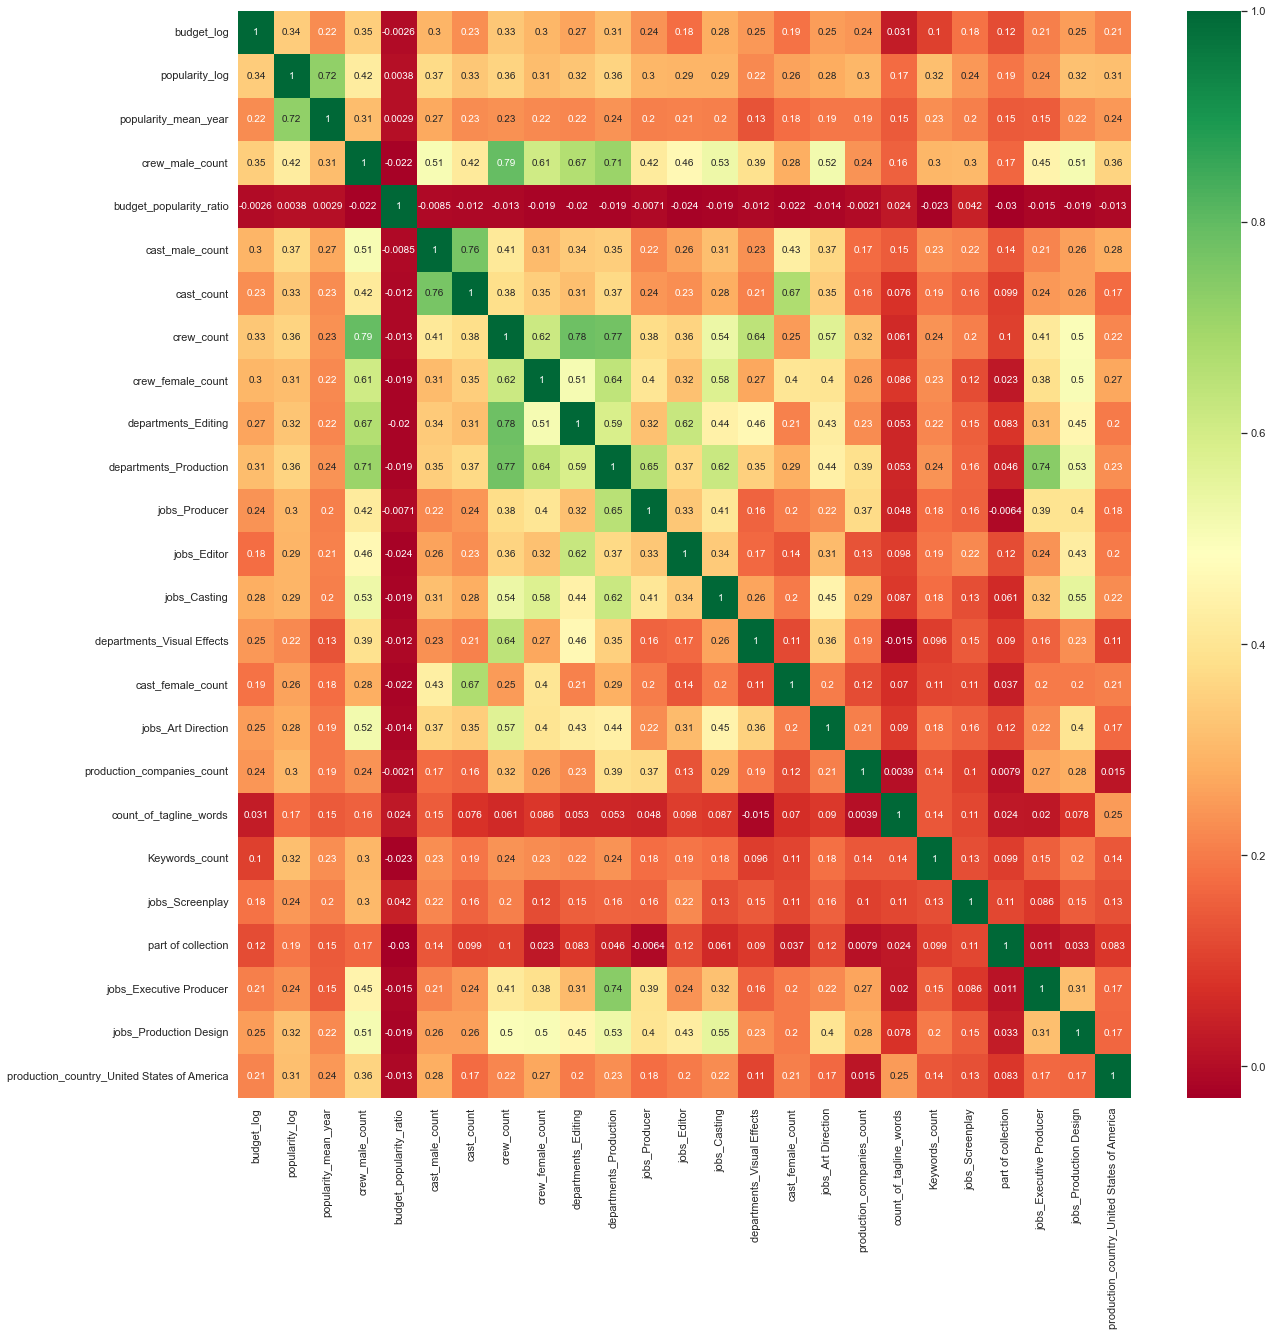

In [334]:
corrmat=x[selected_feature].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [335]:
x=x[selected_feature]
x_test=test[selected_feature]

# Modeling

In [336]:
x_test=x_test.drop(['popularity_log', 'popularity_mean_year','budget_popularity_ratio'],axis=1)
x=x.drop(['popularity_log', 'popularity_mean_year','budget_popularity_ratio'],axis=1)

In [337]:
import time

In [338]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn. ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 

In [339]:
#catboost and lightgbm taking lot time to run that's why it out as command also mse for them is higher copmared to others
#pip install catboost

In [340]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [341]:
#pip install lightgbm

In [342]:
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [343]:
from tqdm import tqdm
def select_model (x,y):
    best_models={}
    model=[
        {'name':'LinearRegression',
        'estimator':LinearRegression()
        },
        {
        'name':'RandomForestRegression',
        'estimator':RandomForestRegressor()
        },
        {'name':'GradientBoostingRegressor',
        'estimator':GradientBoostingRegressor()
        },
        {'name':'XGBoost',
        'estimator':XGBRegressor()
       # },
        #{'name':'LightGBM',
        #'estimator':LGBMRegressor()
       # },
       #  {'name':'catboost',
       # 'estimator':CatBoostRegressor(verbose=False)
        }
    ]
    for model in tqdm(model):
        start=time.time()
        grid=GridSearchCV(model['estimator'],param_grid={},cv=5,scoring='neg_mean_squared_error',verbose=False,n_jobs=1)
        grid.fit(x,y)
        best_models[model['name']]={'score':grid.best_score_,'params':grid.best_params_,'model':model['estimator'],}
        end=time.time()
        run=end-start
        
    return best_models

In [344]:

model=select_model(x,y)
model

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:30<00:00,  7.75s/it]


{'LinearRegression': {'score': -5.573791497410628,
  'params': {},
  'model': LinearRegression()},
 'RandomForestRegression': {'score': -5.215963749697798,
  'params': {},
  'model': RandomForestRegressor()},
 'GradientBoostingRegressor': {'score': -4.977700949093675,
  'params': {},
  'model': GradientBoostingRegressor()},
 'XGBoost': {'score': -6.001726846909433,
  'params': {},
  'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=

In [345]:
#Cross validation

In [346]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('Random forest',RandomForestRegressor()))
models.append(('Gradient boosting',GradientBoostingRegressor()))
models.append(('XGBoost',XGBRegressor()))



In [347]:
from sklearn.model_selection import KFold,cross_val_score

In [348]:

results=dict()
for name, model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results[name]=(cv_results.mean(),cv_results.std())
    
print()
print("name        results.mean      results.std")
for key,value in results.items():
    print(key,value)


name        results.mean      results.std
LR (-5.567029168121083, 0.6264789556180675)
Random forest (-5.180301240311859, 0.7391243840681572)
Gradient boosting (-4.93826311868218, 0.6971311607263879)
XGBoost (-5.717890524886155, 0.6377975349136725)


Here least negative mean squared error for Gradient boosting.So can consider GradientBoosting as best model to predict revenue

# Hyper Tuning

In [349]:
from sklearn.model_selection import RandomizedSearchCV

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=42,test_size=0.2)

In [352]:
#Tuning for xgboost

In [353]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [354]:
rs_model=RandomizedSearchCV(XGBRegressor(),param_distributions=params,
                            n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [355]:
#model fitting
rs_model.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

In [356]:
rs_model.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [357]:
rs_model.best_score_

-4.968729106201434

In [394]:
h_xgb=XGBRegressor(min_child_weight= 3,
 max_depth= 4,
 learning_rate= 0.05,
 gamma= 0.4,
 colsample_bytree= 0.4)

In [395]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(h_xgb,x,y,cv=10,scoring='neg_mean_squared_error')
score

array([-5.51046296, -6.21489541, -4.70972483, -5.63653328, -4.89643011,
       -4.16238041, -5.57361485, -4.88058551, -4.58084907, -3.80604728])

In [396]:
score.mean()

-4.997152370507749

In [361]:
clf = GradientBoostingRegressor(criterion = "mae")
clf.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'mae',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [362]:


# Create a Gradient Boosted Regressor with specified criterion
gb_regressor = GradientBoostingRegressor(criterion = "mae")

# Create the parameter grid
param_grid = {'max_depth' : [2, 4, 8, 10, 12],
              'n_estimators' : [100, 200, 300],
              'max_features' : ['auto', 'sqrt'],
              "criterion" : ["friedman_mse", "mse", "mae"]}

# Create a Randomized Search CV object
random_grid_gb = RandomizedSearchCV(gb_regressor,param_distributions=param_grid,
                            n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
print(random_grid_gb)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(criterion='mae'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'max_depth': [2, 4, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=3)


In [363]:
random_grid_gb.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\ensemble\_gb.py", line 533, in fit
    raise ValueError(
ValueError: criterion='mae' is not supported. Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared erro

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(criterion='mae'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'max_depth': [2, 4, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=3)

In [364]:
random_grid_gb.best_score_

-5.584076478655701

In [365]:
random_grid_gb.best_params_

{'n_estimators': 300,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'friedman_mse'}

In [397]:
h_gb=GradientBoostingRegressor(n_estimators= 300,
 max_features='sqrt',
 max_depth= 8,
 criterion= 'friedman_mse')

In [398]:
score=cross_val_score(h_gb,x,y,cv=10,scoring='neg_mean_squared_error')
score

array([-5.59656031, -6.44682008, -5.24329346, -6.31272835, -5.34401142,
       -4.70840258, -6.3364101 , -5.2842187 , -5.42484222, -4.05874206])

In [399]:
score.mean()

-5.475602928037625

In [369]:
rf = RandomForestRegressor(random_state = 42)

In [370]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [371]:
rf_random = RandomizedSearchCV( RandomForestRegressor(), param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 3, verbose=2, n_jobs = -1)

In [372]:
rf_random.fit(x,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_mean_squared_error', verbose=2)

In [373]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [374]:
rf_random.best_score_

-5.076273884254147

In [400]:
h_random=RandomForestRegressor(n_estimators= 600,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 20,
 bootstrap= True)

In [401]:
score=cross_val_score(h_random,x,y,cv=10,scoring='neg_mean_squared_error')
score

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

array([-5.35440243, -6.28853132, -4.9762048 , -5.79470315, -4.79735905,
       -4.09044907, -5.16494179, -5.14024971, -4.76371516, -3.86310083])

In [402]:
score.mean()

-5.023365731188514

In [403]:
#Checking overfitting

In [379]:
start=time.time()
# Fit the model
h_random.fit(x_train,y_train)
#predict x_valid
end=time.time()
pred1 = h_random.predict(x_train)
pred2 = h_random.predict(x_valid)
print('Time :',end-start)


C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time : 3.6159441471099854


In [380]:
from sklearn.metrics import mean_squared_error
rms=mean_squared_error(pred1,y_train,squared=False)
rms

1.716603519102624

In [381]:
rms1=mean_squared_error(pred2,y_valid,squared=False)
rms1

2.1371250201993104

In [382]:
start=time.time()
h_xgb.fit(x_train,y_train)
end=time.time()
#predict x_valid
pred3 = h_xgb.predict(x_train)
pred4= h_xgb.predict(x_valid)
print('Time :',end-start)



Time : 0.556682825088501


In [383]:
rms3=mean_squared_error(pred3,y_train,squared=False)
rms3

1.8571181151814755

In [384]:
rms4=mean_squared_error(pred4,y_valid,squared=False)
rms4

2.1288541931822604

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


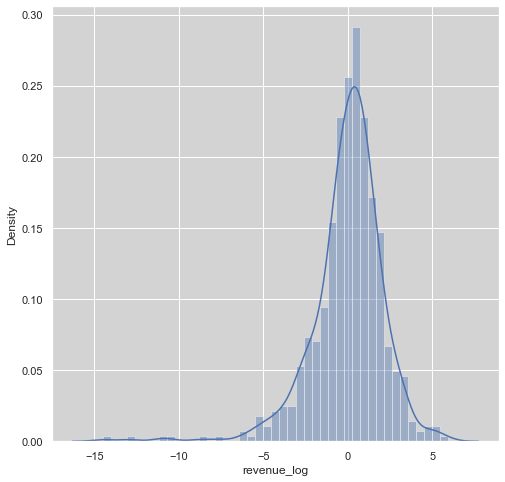

In [385]:
plt.figure(figsize=(8,8))
sns.distplot(y_valid-pred2)
plt.show()

C:\Users\XArchitecture\anaconda3\envs\books\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


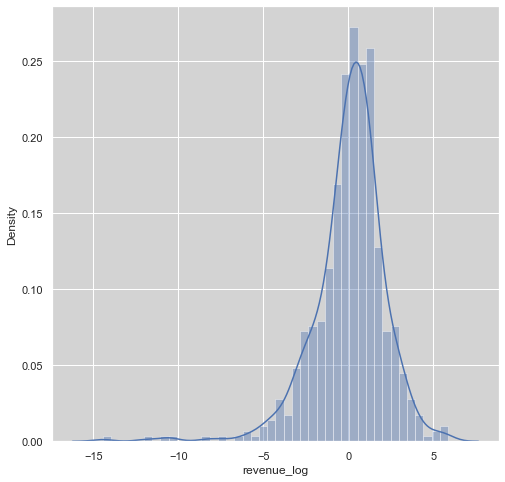

In [386]:
plt.figure(figsize=(8,8))
sns.distplot(y_valid-pred4)
plt.show()

 Random Forest mean_squared error difference between train and test and time taken for fitting are   higher than xgboost.From these we can conclude that best model to predict s XGBoost 

In [387]:
#Final Model

In [388]:
x.columns

Index(['budget_log', 'crew_male_count', 'cast_male_count', 'cast_count',
       'crew_count', 'crew_female_count', 'departments_Editing',
       'departments_Production', 'jobs_Producer', 'jobs_Editor',
       'jobs_Casting', 'departments_Visual Effects', 'cast_female_count',
       'jobs_Art Direction', 'production_companies_count',
       'count_of_tagline_words', 'Keywords_count', 'jobs_Screenplay',
       'part of collection', 'jobs_Executive Producer',
       'jobs_Production Design',
       'production_country_United States of America'],
      dtype='object')

In [389]:
x_test.columns

Index(['budget_log', 'crew_male_count', 'cast_male_count', 'cast_count',
       'crew_count', 'crew_female_count', 'departments_Editing',
       'departments_Production', 'jobs_Producer', 'jobs_Editor',
       'jobs_Casting', 'departments_Visual Effects', 'cast_female_count',
       'jobs_Art Direction', 'production_companies_count',
       'count_of_tagline_words', 'Keywords_count', 'jobs_Screenplay',
       'part of collection', 'jobs_Executive Producer',
       'jobs_Production Design',
       'production_country_United States of America'],
      dtype='object')

In [390]:
model=h_xgb.fit(x,y)

In [391]:
prediction=model.predict(x_test)

In [392]:
import pickle

In [393]:
pickle.dump(model,open('model.pkl','wb'))